In [158]:
import pandas as pd
import numpy as np
data=pd.read_csv('train.csv')
data

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [159]:
data=np.array(data)
m,n=data.shape
m,n

(42000, 785)

In [160]:
np.random.shuffle(data)
data

array([[5, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0]])

In [161]:
#1000 images and Transpose

dev_data=data[0:1000].T

dev_data.shape

(785, 1000)

In [162]:
dev_data

array([[5, 5, 4, ..., 0, 5, 4],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [163]:
# Labels of the data
Y_dev=dev_data[0] 
# Pixel values of the input
X_dev=dev_data[1:n]/255.


In [164]:
train_data=data[1000:m].T
train_data.shape

#labels for train data
Y_train=train_data[0]

# 784 X 41000
X_train=train_data[1:n]/255.
X_train.shape
Y_train

array([2, 6, 8, ..., 9, 4, 3])

In [165]:
# # One Hot encoding
# one_hot_out=np.zeros((Y_train.size,Y_train.max()+1))
# # for j in range(0,Y_train.size):
# #     one_hot_out[j][Y_train[j]]=1.
# # one_hot_out=one_hot_out.T
# # Y_train,one_hot_out

# one_hot_out[np.arange(Y_train.size),Y_train]=1
# one_hot_out=one_hot_out.T
# Y_train,one_hot_out



In [166]:
# def init_params():
#     W1=np.random.rand(10,784)-0.5 #[-0.5 ,0.5)
#     b1=np.random.rand(10,1)-0.5
#     W2=np.random.rand(10,10)-0.5 #[-0.5 ,0.5)
#     b2=np.random.rand(10,1)-0.5
#     return W1,b1,W2,b2

# def softmax(Z):
#     return np.exp(Z)/np.sum(np.exp(Z))

# def Relu(Z):
#     return np.maximum(Z,0)

# def ReLU_deriv(Z):
#     return Z > 0

# def forward_prop(W1, b1, W2, b2, X):
#     Z1=np.dot(W1,X)+b1
#     A1=Relu(Z1)
#     # print("A1: ",A1.shape)
#     Z2 = W2.dot(A1) + b2
#     A2 = softmax(Z2)
#     return Z1, A1, Z2, A2

# def one_hot(Y):
#     One_hot_out=np.zeros((Y.size,Y.max()+1))
#     One_hot_out[np.arange(Y.size)][Y]=1
#     One_hot_out=One_hot_out.T
#     return One_hot_out


# def backward_prop(Z1, A1, Z2 , A2, W1 , W2, X, Y):
#     one_hot_Y = one_hot(Y)
#     dZ2 = A2 - one_hot_Y
#     dW2 = 1 / m * dZ2.dot(A1.T)
#     db2 = 1 / m * np.sum(dZ2)
#     dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
#     dW1 = 1 / m * dZ1.dot(X.T)
#     db1 = 1 / m * np.sum(dZ1)
#     return dW1, db1, dW2, db2

# def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
#     W1 = W1 - alpha * dW1
#     b1 = b1 - alpha * db1    
#     W2 = W2 - alpha * dW2  
#     b2 = b2 - alpha * db2   
#     return W1, b1, W2, b2

def init_params():
    W1 = np.random.rand(500, 784) - 0.5
    b1 = np.random.rand(500, 1) - 0.5
    W2 = np.random.rand(10, 500) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    # print("A2: ",A2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)

    # print("W2: ",W2.T.shape,"dZ2: ",dZ2.shape,"Z2: ",Z2.shape)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [167]:
# def get_predictions(A):
#     return np.argmax(A,0)

# def get_accuracy(predictions, Y):
#     print(predictions, Y)
#     return np.sum(predictions==Y)/Y.size

# def gradient_descent(X, Y, alpha, iterations):
#     W1, b1, W2, b2 = init_params()
#     for i in range(iterations):
#         Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
#         dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
#         W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
#         if i % 10 == 0:
#             print("Iteration: ", i)
#             print("A2: ",A2[0])
#             print("W1: ",W1[0])
#             predictions = get_predictions(A2)
#             print(get_accuracy(predictions, Y))
#     return W1, b1, W2, b2

def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            # print("dW2: ",dW2[0][0])
            # print("A2: ",A2[0][0])
            np.set_printoptions(suppress=True, precision=3)
            for i in [0,1,2,-3,-2,-1]:
               print("A2 : ",np.round(A2[:,i]*100,3))
            print("Sum: ",np.sum(A2[:,[0]]*100))
            predictions = get_predictions(A2)
            print("Accuracy: ",get_accuracy(predictions, Y)*100,"%")
    return W1, b1, W2, b2

In [168]:
# W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
A2 :  [ 0.001  0.011  0.     0.     0.     0.     1.703 98.286  0.     0.   ]
A2 :  [ 0.    99.991  0.     0.     0.     0.     0.     0.     0.008  0.   ]
A2 :  [ 0.015 77.904  0.     0.     0.     0.    21.844  0.     0.236  0.   ]
A2 :  [ 0.    99.627  0.     0.     0.     0.     0.2    0.     0.172  0.   ]
A2 :  [ 0.     1.731  0.     0.     0.016  0.     7.328 89.352  0.118  1.454]
A2 :  [ 0.     0.006  0.    88.345  0.     0.     5.682  5.924  0.042  0.   ]
Sum:  99.99999999999996
[7 1 1 ... 1 7 3] [2 6 8 ... 9 4 3]
Accuracy:  4.109756097560976 %
Iteration:  10
A2 :  [ 0.     0.005 82.154  1.378  0.     0.    16.464  0.     0.     0.   ]
A2 :  [ 0.     0.     3.611  0.     0.     0.104 96.247  0.     0.038  0.   ]
A2 :  [ 0.     0.     0.585  0.004  0.     0.101  0.009  0.    99.041  0.259]
A2 :  [ 0.     0.     0.     0.     0.002  0.     0.     0.     0.    99.998]
A2 :  [ 0.     0.002  0.     0.004 23.209  0.019  0.     0.021  0.002 76.745]
A2 :  [ 0.003  1.549  

In [176]:
from matplotlib import pyplot as plt

def make_predictions(X, W1, b1, W2, b2 ):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_dev[:, index, None]
    prediction = make_predictions(X_dev[:, index, None], W1, b1, W2, b2)
    label = Y_dev[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    return (label,prediction[0])

ith iteration :  0 j index:  652
Prediction:  [0]
Label:  0


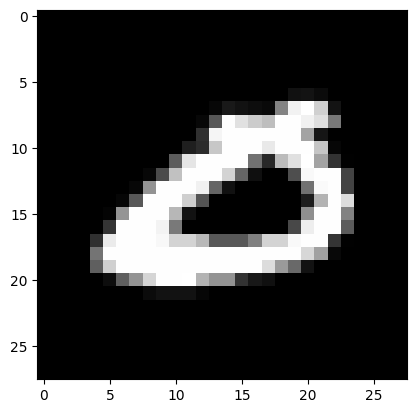

ith iteration :  1 j index:  815
Prediction:  [1]
Label:  1


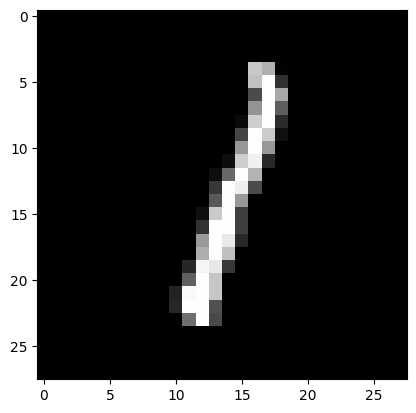

ith iteration :  2 j index:  358
Prediction:  [9]
Label:  9


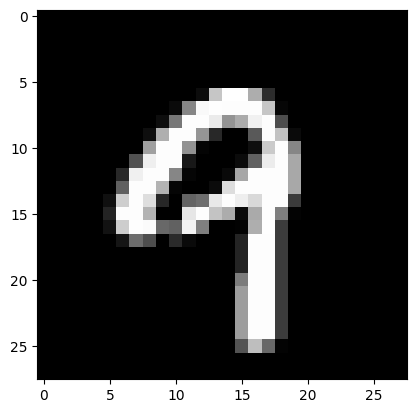

ith iteration :  3 j index:  205
Prediction:  [2]
Label:  2


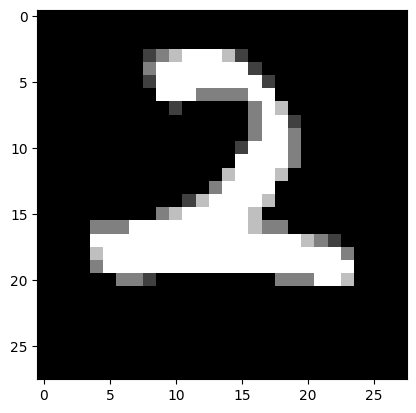

ith iteration :  4 j index:  362
Prediction:  [3]
Label:  3


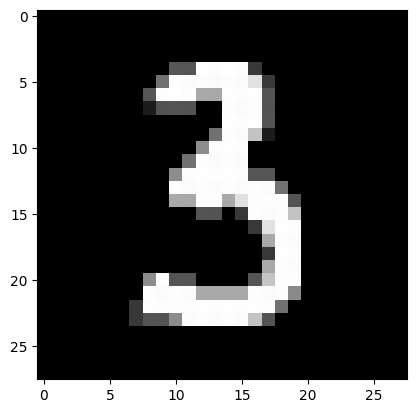

ith iteration :  5 j index:  724
Prediction:  [6]
Label:  6


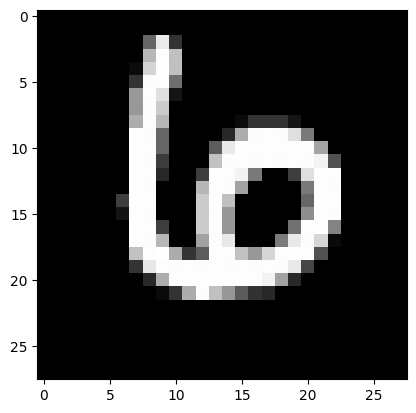

ith iteration :  6 j index:  247
Prediction:  [7]
Label:  7


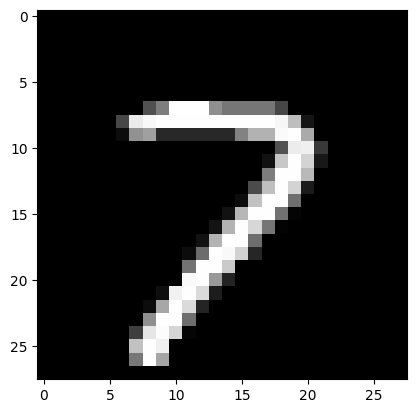

ith iteration :  7 j index:  894
Prediction:  [1]
Label:  1


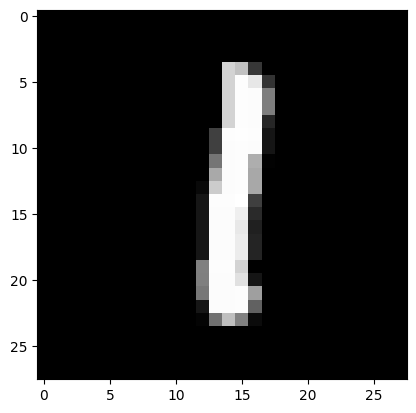

ith iteration :  8 j index:  324
Prediction:  [6]
Label:  2


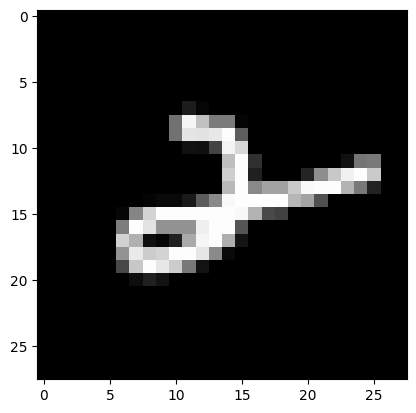

ith iteration :  9 j index:  987
Prediction:  [4]
Label:  4


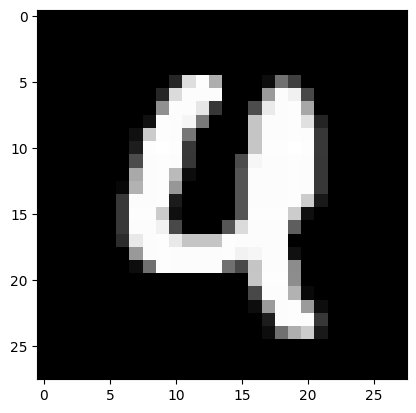

ith iteration :  10 j index:  929
Prediction:  [5]
Label:  5


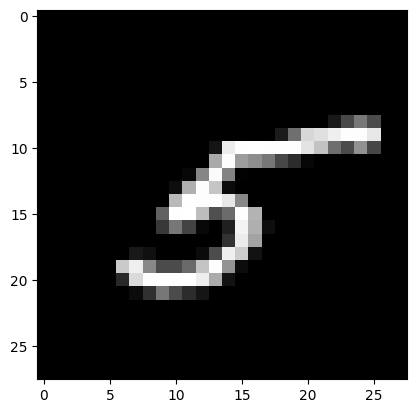

ith iteration :  11 j index:  172
Prediction:  [0]
Label:  0


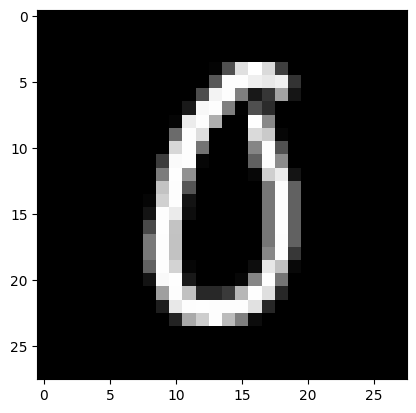

ith iteration :  12 j index:  156
Prediction:  [9]
Label:  9


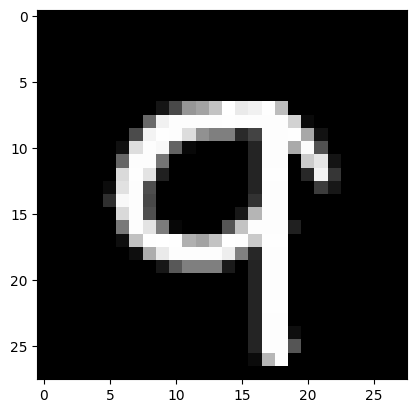

ith iteration :  13 j index:  498
Prediction:  [2]
Label:  2


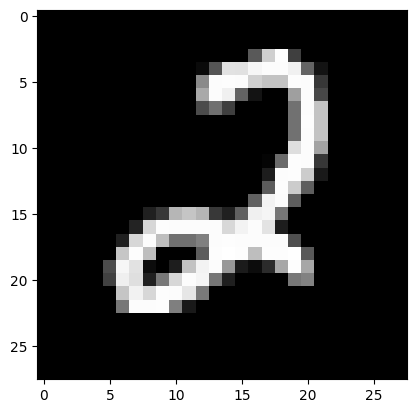

ith iteration :  14 j index:  803
Prediction:  [8]
Label:  5


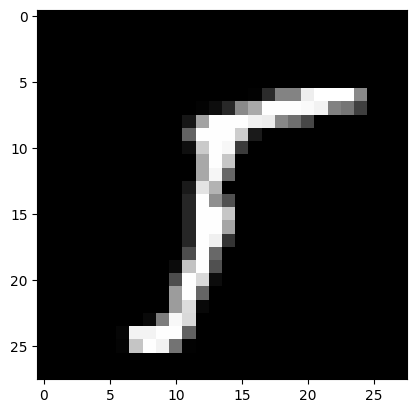

ith iteration :  15 j index:  212
Prediction:  [8]
Label:  8


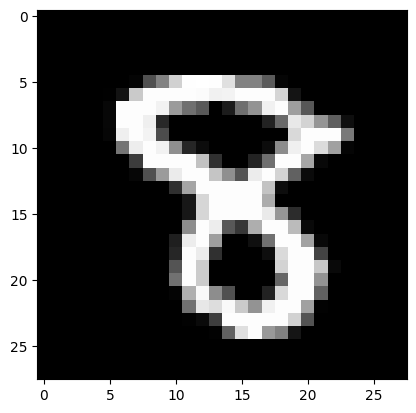

ith iteration :  16 j index:  370
Prediction:  [3]
Label:  5


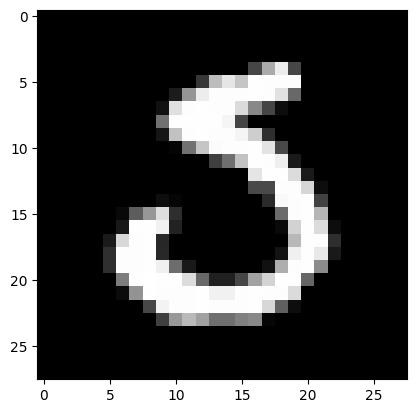

ith iteration :  17 j index:  920
Prediction:  [6]
Label:  6


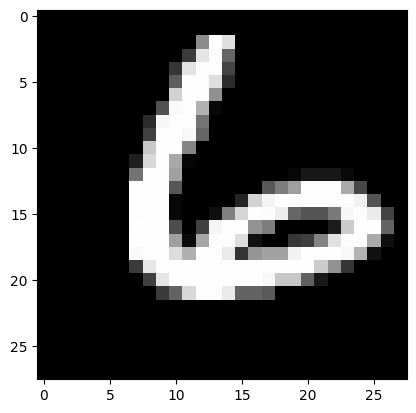

ith iteration :  18 j index:  927
Prediction:  [1]
Label:  1


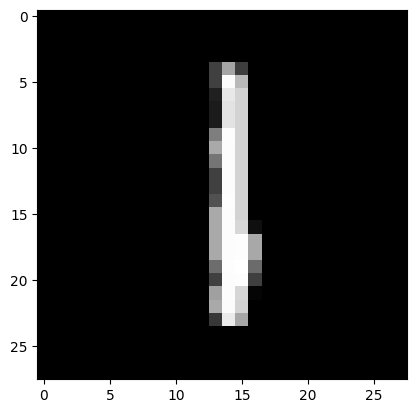

ith iteration :  19 j index:  266
Prediction:  [2]
Label:  2


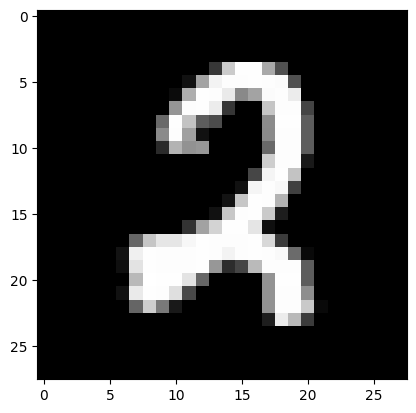

ith iteration :  20 j index:  931
Prediction:  [2]
Label:  2


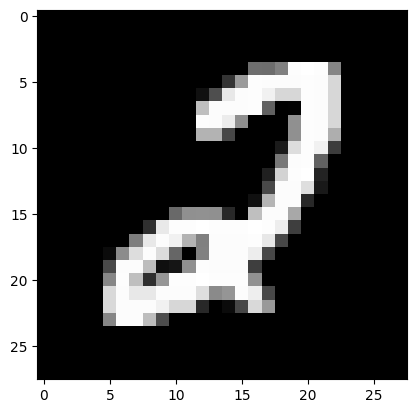

ith iteration :  21 j index:  187
Prediction:  [9]
Label:  9


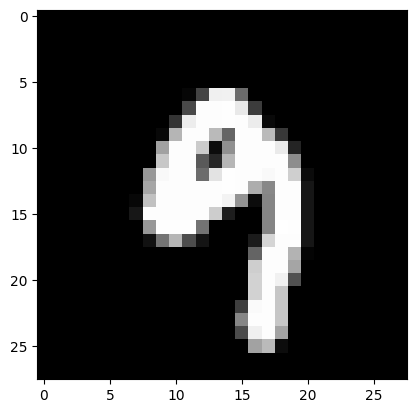

ith iteration :  22 j index:  610
Prediction:  [8]
Label:  8


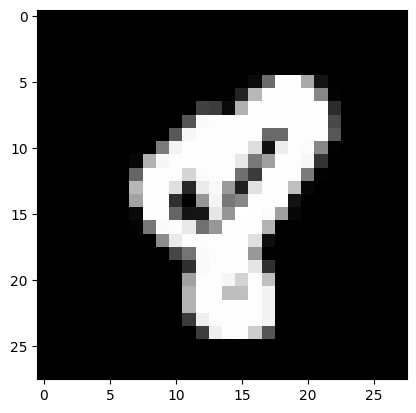

ith iteration :  23 j index:  836
Prediction:  [7]
Label:  7


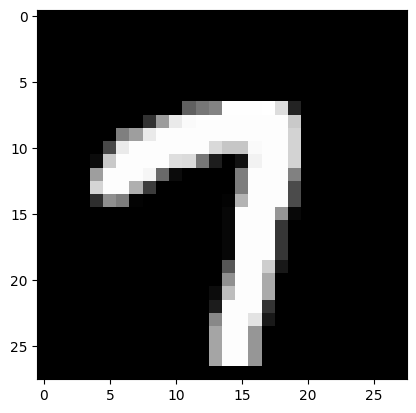

ith iteration :  24 j index:  982
Prediction:  [0]
Label:  0


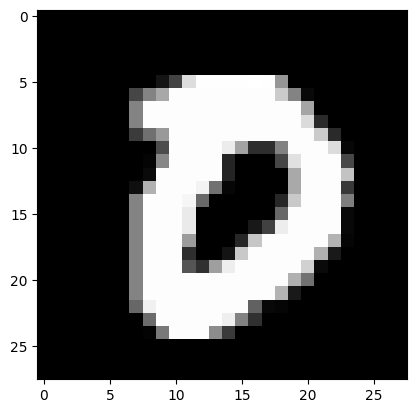

ith iteration :  25 j index:  321
Prediction:  [0]
Label:  0


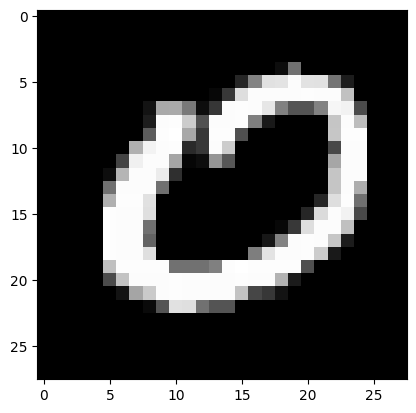

ith iteration :  26 j index:  863
Prediction:  [5]
Label:  5


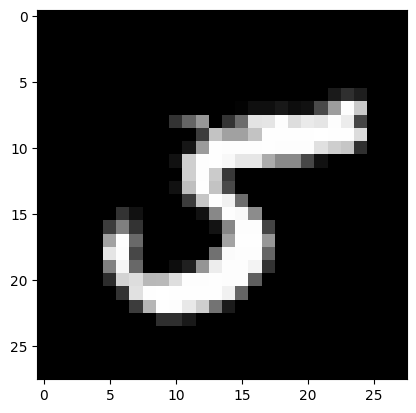

ith iteration :  27 j index:  168
Prediction:  [1]
Label:  1


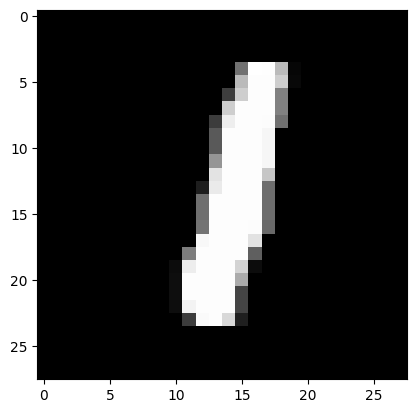

ith iteration :  28 j index:  996
Prediction:  [9]
Label:  9


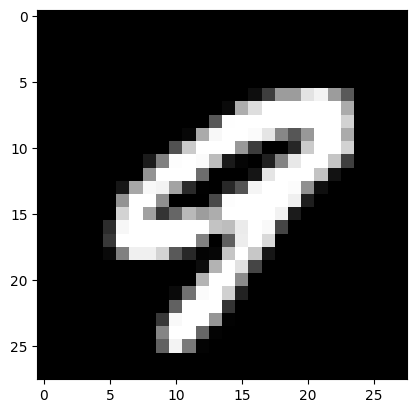

ith iteration :  29 j index:  289
Prediction:  [8]
Label:  8


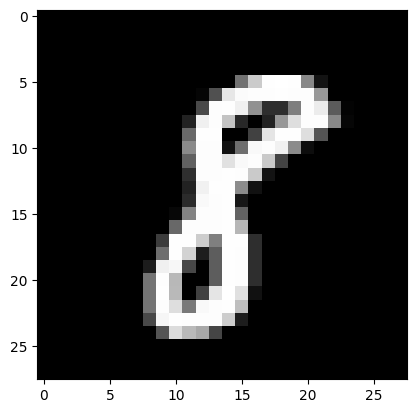

ith iteration :  30 j index:  361
Prediction:  [9]
Label:  4


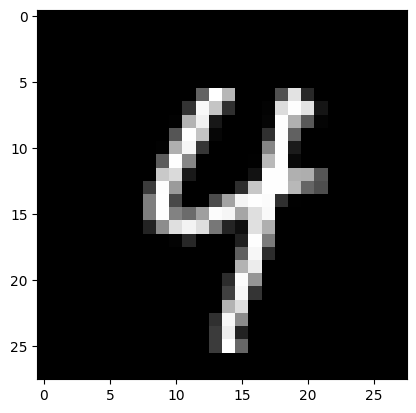

ith iteration :  31 j index:  175
Prediction:  [9]
Label:  9


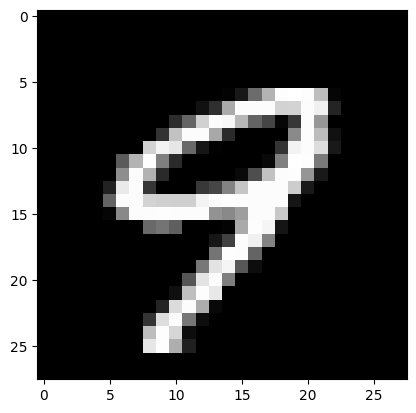

ith iteration :  32 j index:  345
Prediction:  [0]
Label:  0


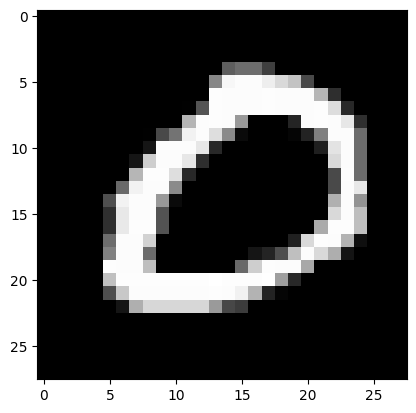

ith iteration :  33 j index:  92
Prediction:  [5]
Label:  6


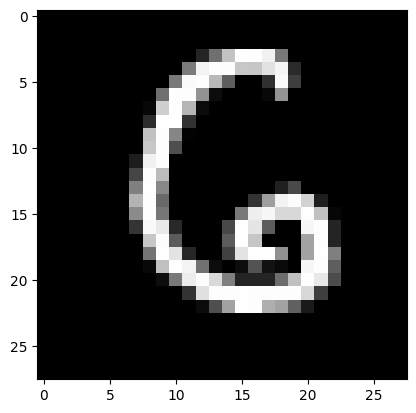

ith iteration :  34 j index:  142
Prediction:  [7]
Label:  7


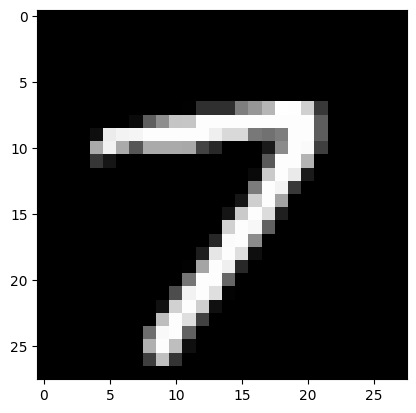

ith iteration :  35 j index:  431
Prediction:  [5]
Label:  5


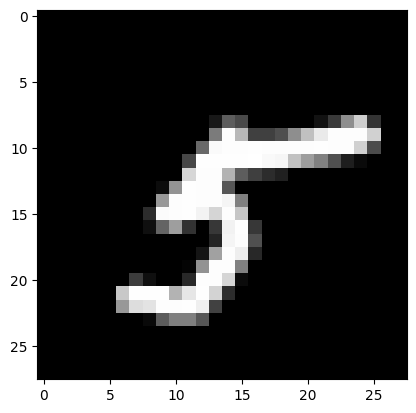

ith iteration :  36 j index:  777
Prediction:  [8]
Label:  8


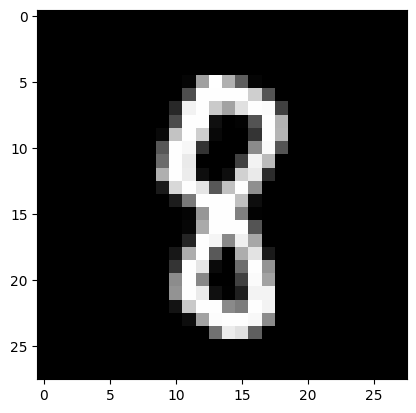

ith iteration :  37 j index:  616
Prediction:  [1]
Label:  1


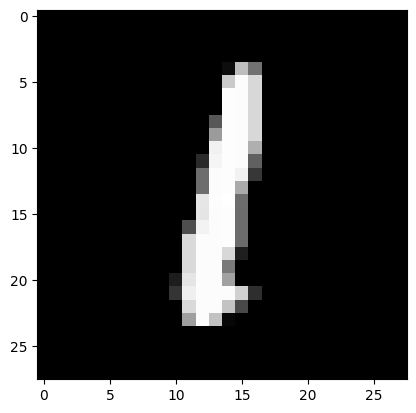

ith iteration :  38 j index:  696
Prediction:  [0]
Label:  0


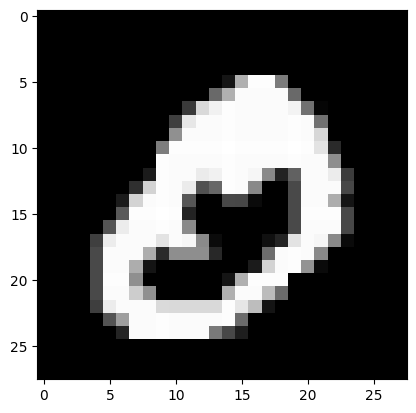

ith iteration :  39 j index:  299
Prediction:  [8]
Label:  8


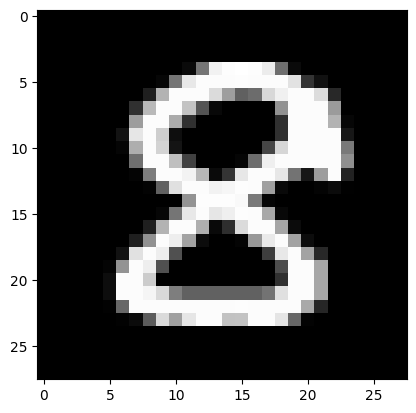

ith iteration :  40 j index:  835
Prediction:  [3]
Label:  3


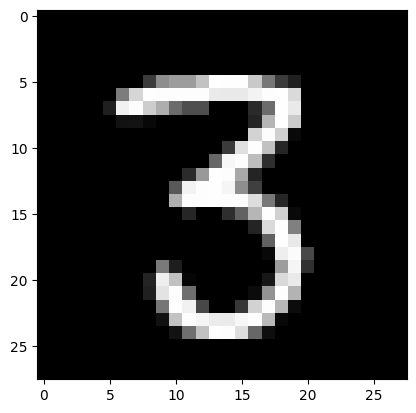

ith iteration :  41 j index:  607
Prediction:  [6]
Label:  6


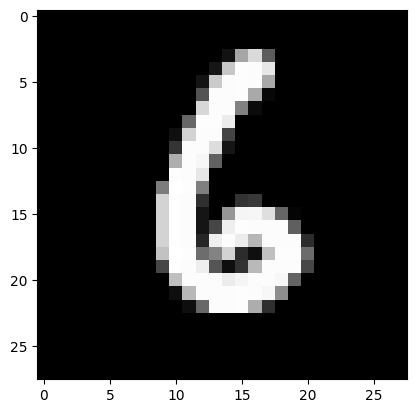

ith iteration :  42 j index:  796
Prediction:  [6]
Label:  6


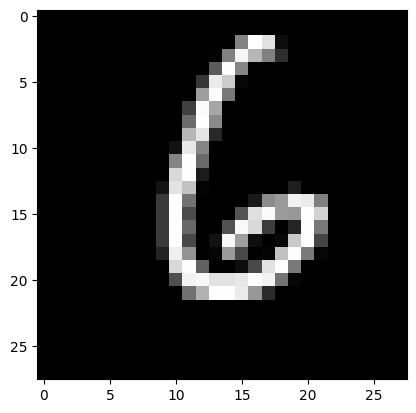

ith iteration :  43 j index:  922
Prediction:  [5]
Label:  5


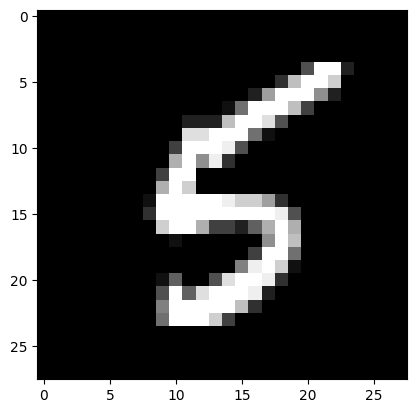

ith iteration :  44 j index:  728
Prediction:  [8]
Label:  8


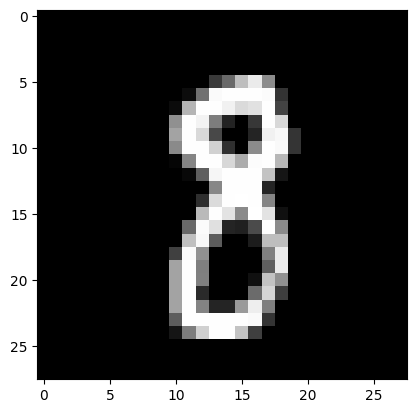

ith iteration :  45 j index:  959
Prediction:  [2]
Label:  2


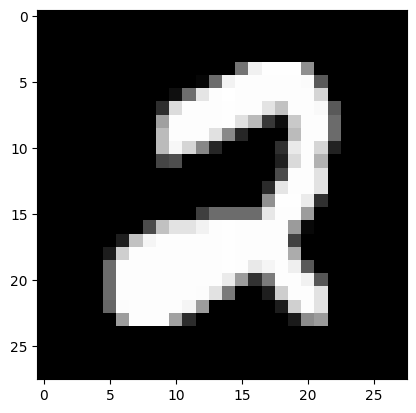

ith iteration :  46 j index:  299
Prediction:  [8]
Label:  8


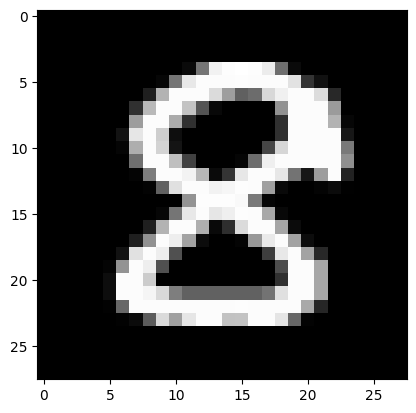

ith iteration :  47 j index:  333
Prediction:  [0]
Label:  0


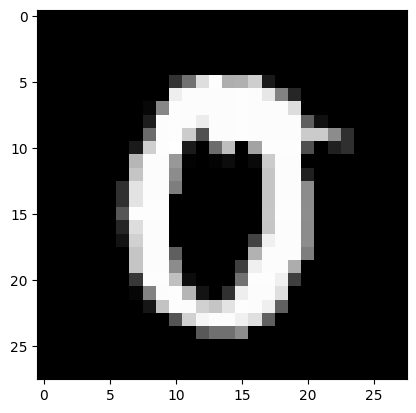

ith iteration :  48 j index:  305
Prediction:  [1]
Label:  1


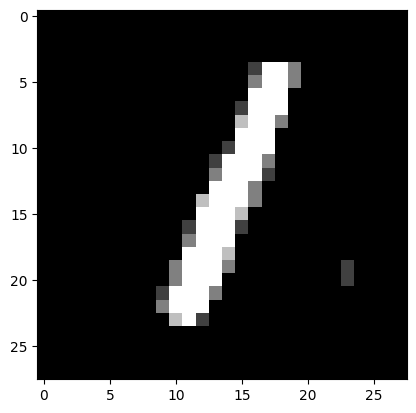

ith iteration :  49 j index:  962
Prediction:  [4]
Label:  4


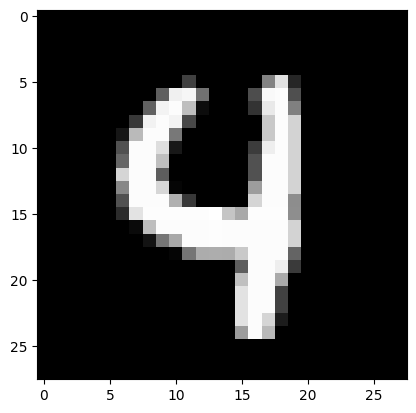

ith iteration :  50 j index:  994
Prediction:  [3]
Label:  3


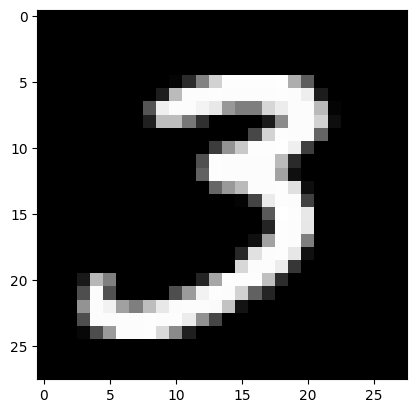

ith iteration :  51 j index:  390
Prediction:  [4]
Label:  4


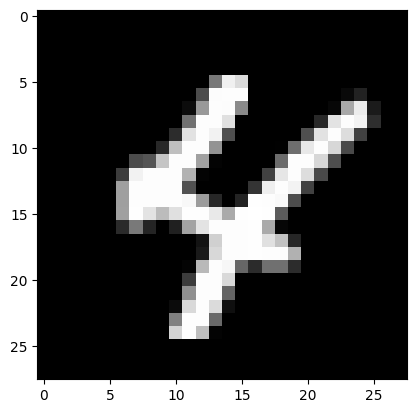

ith iteration :  52 j index:  479
Prediction:  [8]
Label:  8


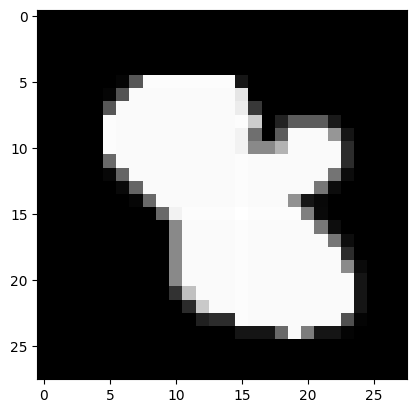

ith iteration :  53 j index:  356
Prediction:  [7]
Label:  7


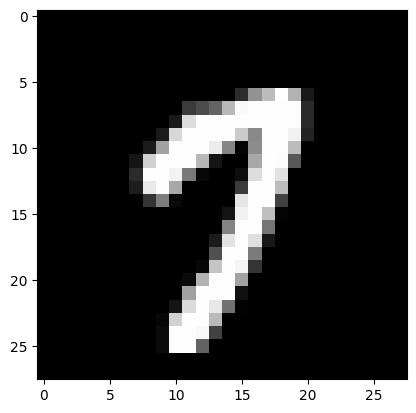

ith iteration :  54 j index:  588
Prediction:  [7]
Label:  7


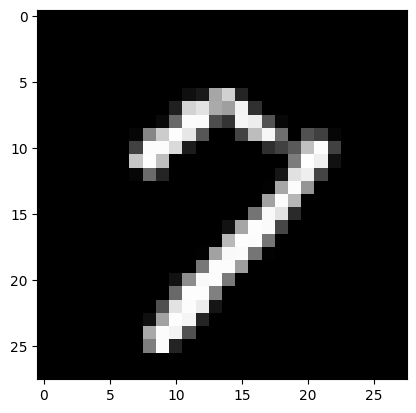

ith iteration :  55 j index:  60
Prediction:  [2]
Label:  2


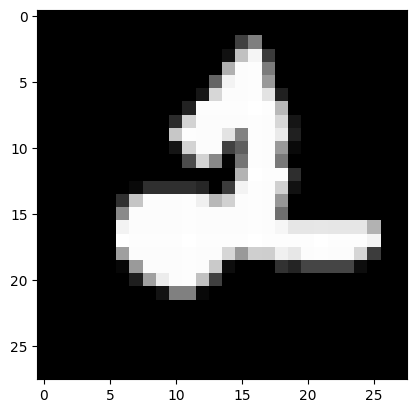

ith iteration :  56 j index:  99
Prediction:  [1]
Label:  1


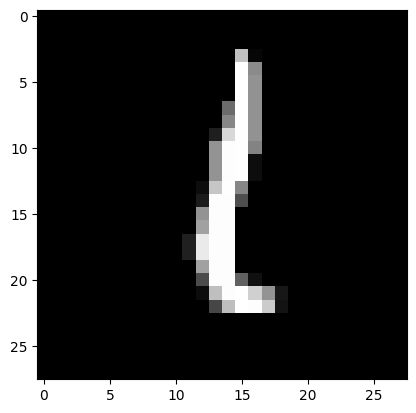

ith iteration :  57 j index:  84
Prediction:  [3]
Label:  3


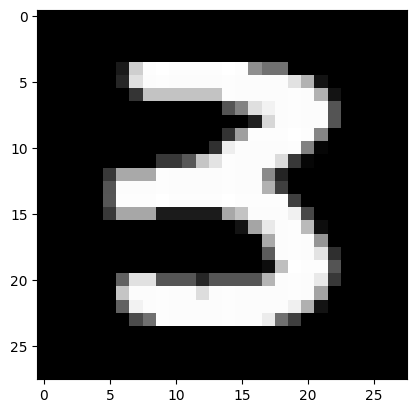

ith iteration :  58 j index:  29
Prediction:  [2]
Label:  2


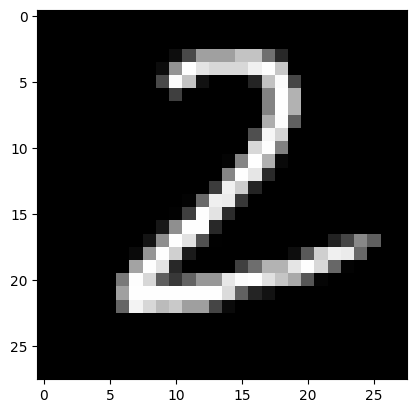

ith iteration :  59 j index:  529
Prediction:  [0]
Label:  0


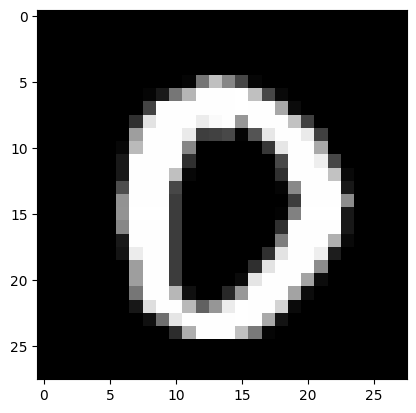

ith iteration :  60 j index:  953
Prediction:  [3]
Label:  3


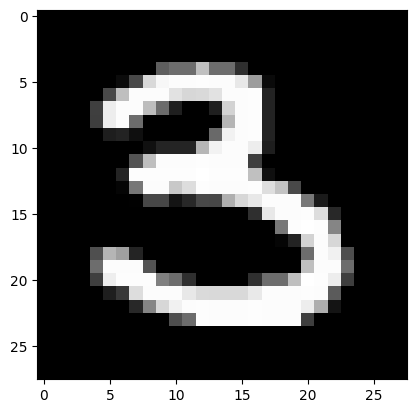

ith iteration :  61 j index:  795
Prediction:  [4]
Label:  4


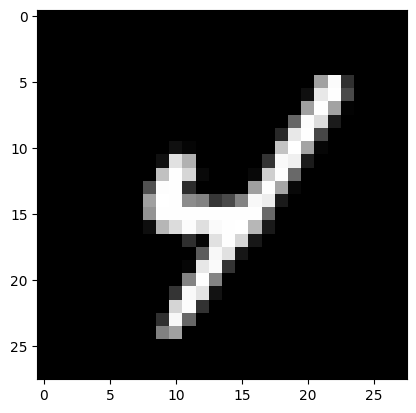

ith iteration :  62 j index:  83
Prediction:  [9]
Label:  9


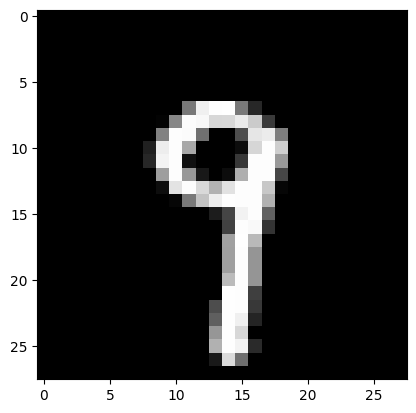

ith iteration :  63 j index:  500
Prediction:  [8]
Label:  4


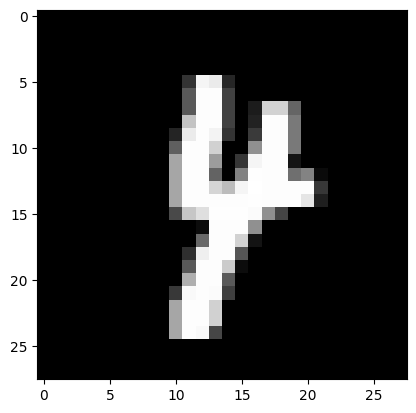

ith iteration :  64 j index:  934
Prediction:  [2]
Label:  2


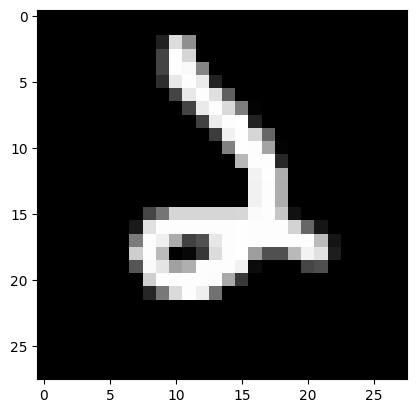

ith iteration :  65 j index:  184
Prediction:  [6]
Label:  6


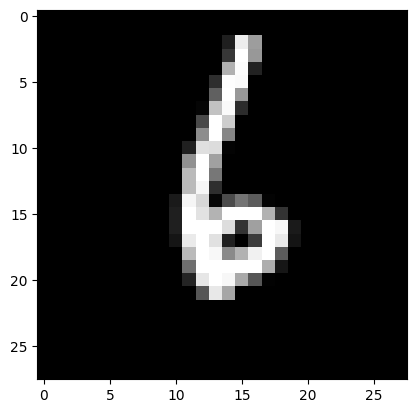

ith iteration :  66 j index:  610
Prediction:  [8]
Label:  8


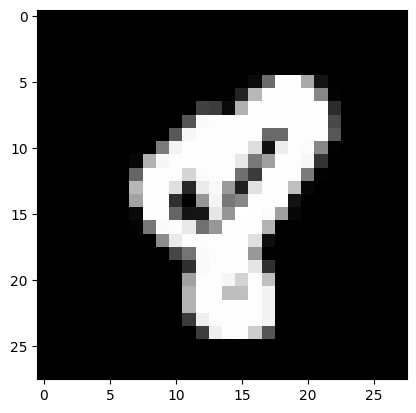

ith iteration :  67 j index:  928
Prediction:  [7]
Label:  7


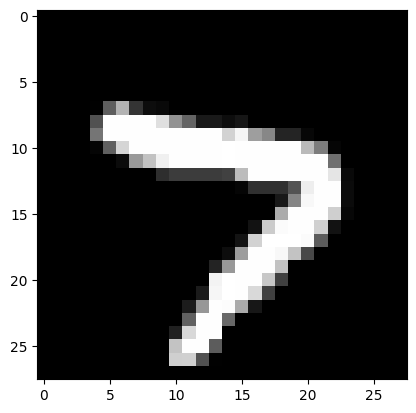

ith iteration :  68 j index:  821
Prediction:  [9]
Label:  9


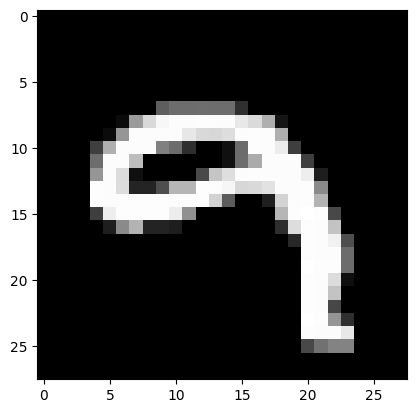

ith iteration :  69 j index:  720
Prediction:  [3]
Label:  5


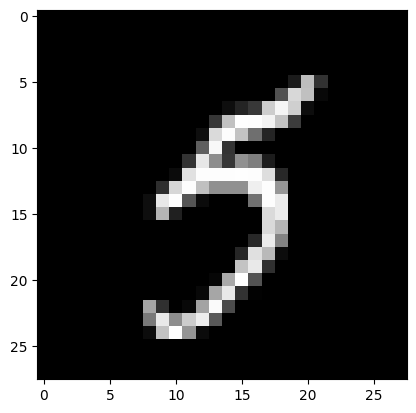

ith iteration :  70 j index:  189
Prediction:  [7]
Label:  7


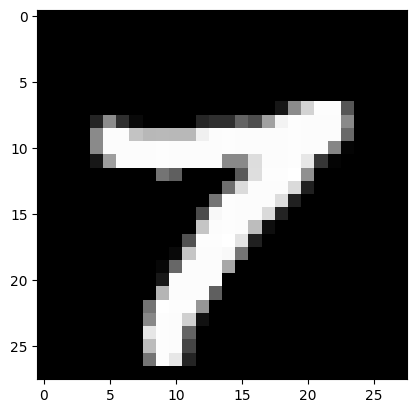

ith iteration :  71 j index:  834
Prediction:  [6]
Label:  6


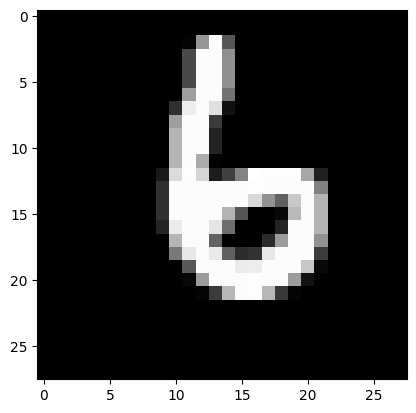

ith iteration :  72 j index:  906
Prediction:  [7]
Label:  7


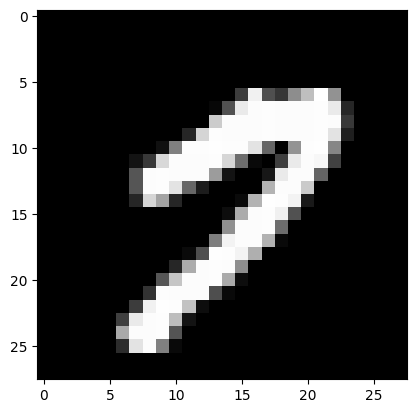

ith iteration :  73 j index:  518
Prediction:  [7]
Label:  7


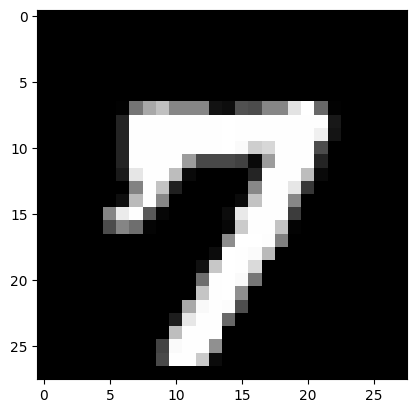

ith iteration :  74 j index:  516
Prediction:  [3]
Label:  3


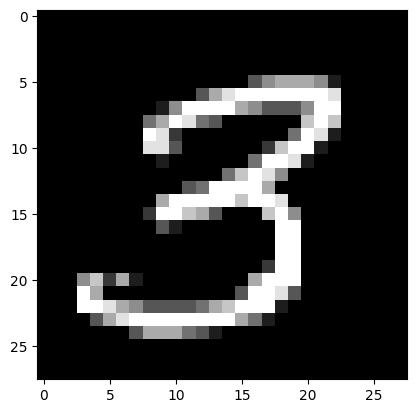

ith iteration :  75 j index:  623
Prediction:  [0]
Label:  5


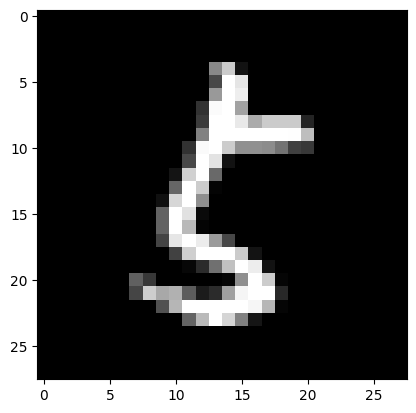

ith iteration :  76 j index:  60
Prediction:  [2]
Label:  2


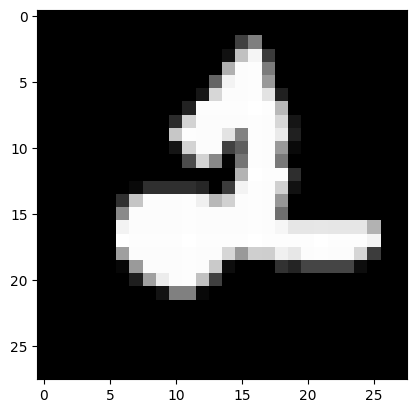

ith iteration :  77 j index:  301
Prediction:  [1]
Label:  1


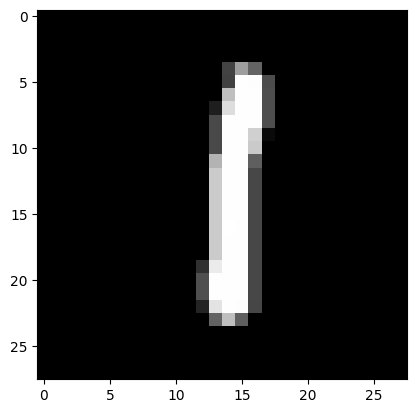

ith iteration :  78 j index:  954
Prediction:  [0]
Label:  0


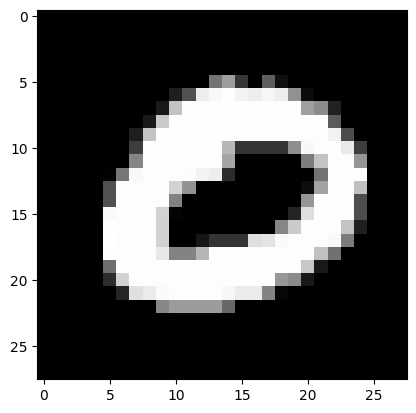

ith iteration :  79 j index:  727
Prediction:  [3]
Label:  3


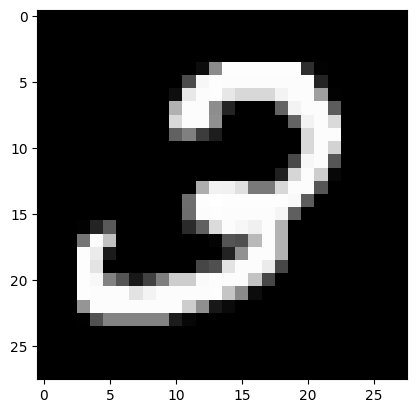

ith iteration :  80 j index:  895
Prediction:  [7]
Label:  7


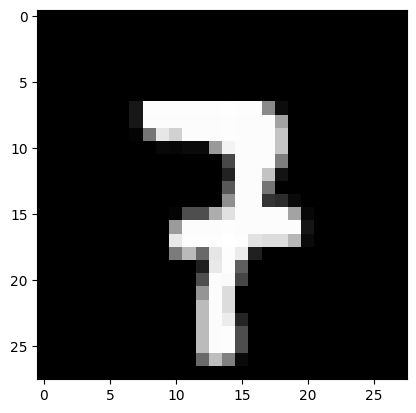

ith iteration :  81 j index:  725
Prediction:  [0]
Label:  0


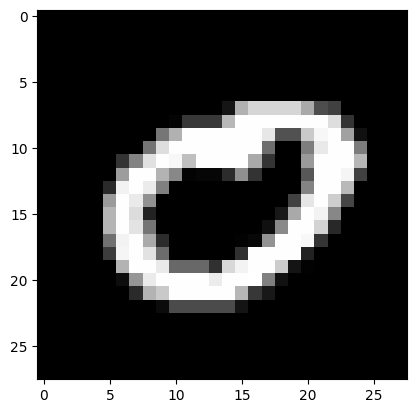

ith iteration :  82 j index:  682
Prediction:  [5]
Label:  5


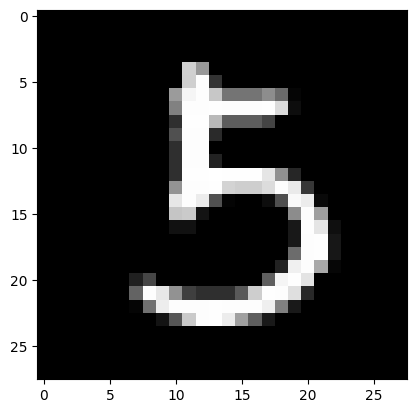

ith iteration :  83 j index:  554
Prediction:  [4]
Label:  4


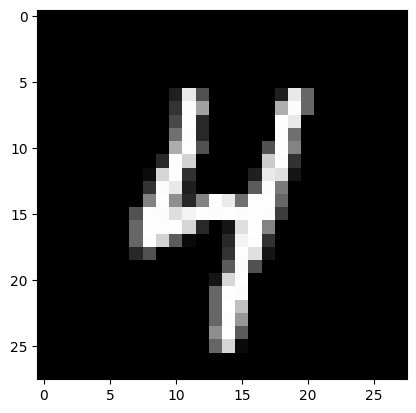

ith iteration :  84 j index:  265
Prediction:  [2]
Label:  2


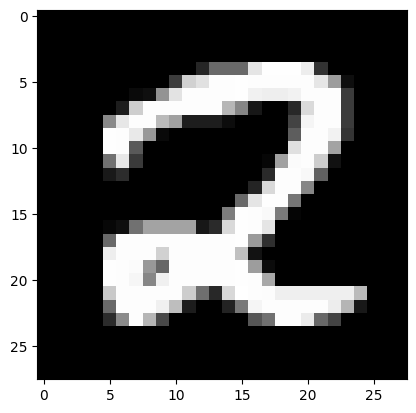

ith iteration :  85 j index:  690
Prediction:  [5]
Label:  8


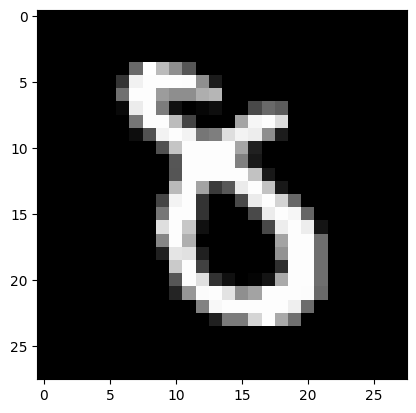

ith iteration :  86 j index:  201
Prediction:  [2]
Label:  2


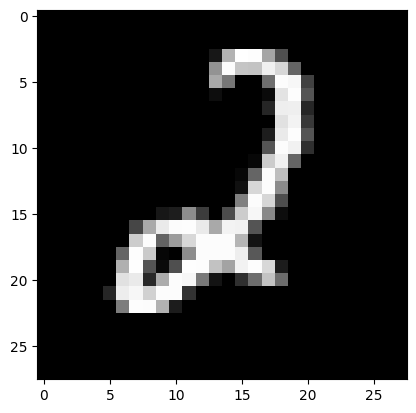

ith iteration :  87 j index:  388
Prediction:  [5]
Label:  5


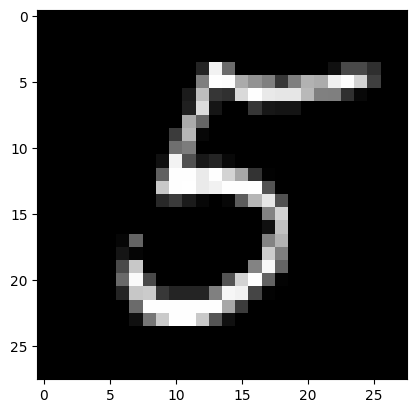

ith iteration :  88 j index:  521
Prediction:  [6]
Label:  6


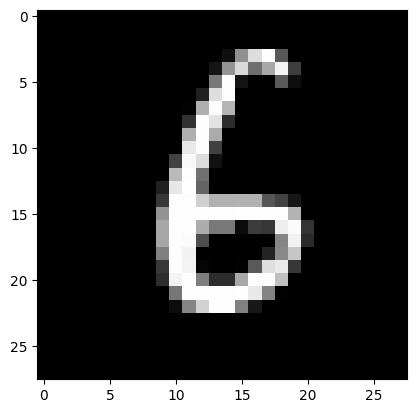

ith iteration :  89 j index:  82
Prediction:  [6]
Label:  6


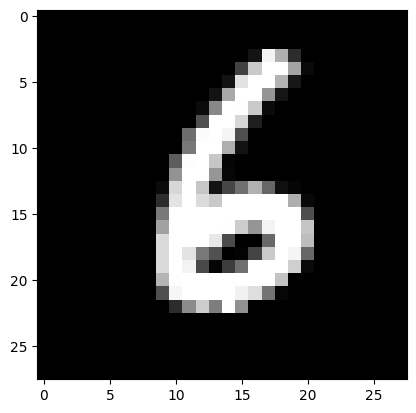

ith iteration :  90 j index:  468
Prediction:  [3]
Label:  3


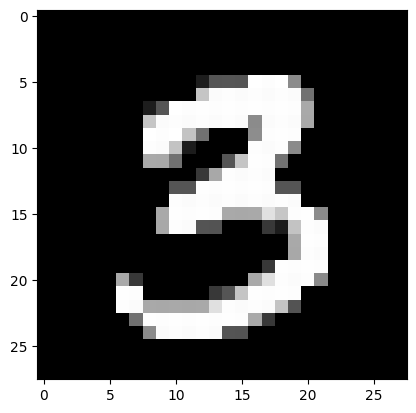

ith iteration :  91 j index:  235
Prediction:  [3]
Label:  3


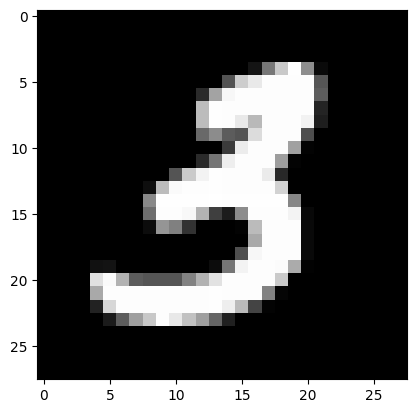

ith iteration :  92 j index:  745
Prediction:  [4]
Label:  4


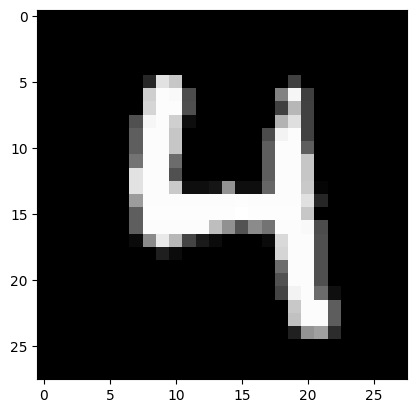

ith iteration :  93 j index:  802
Prediction:  [8]
Label:  8


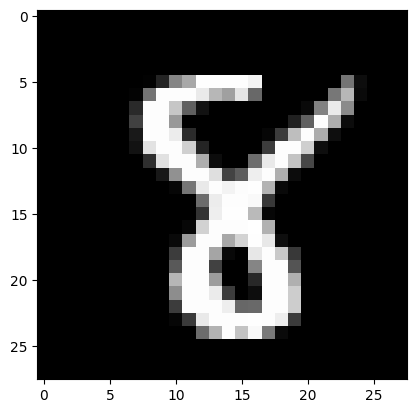

ith iteration :  94 j index:  923
Prediction:  [7]
Label:  7


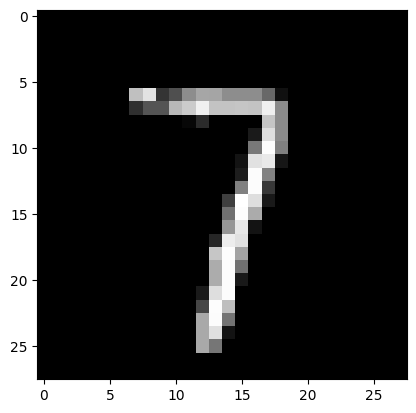

ith iteration :  95 j index:  241
Prediction:  [9]
Label:  9


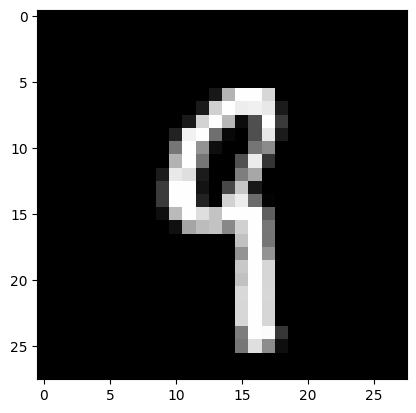

ith iteration :  96 j index:  508
Prediction:  [8]
Label:  8


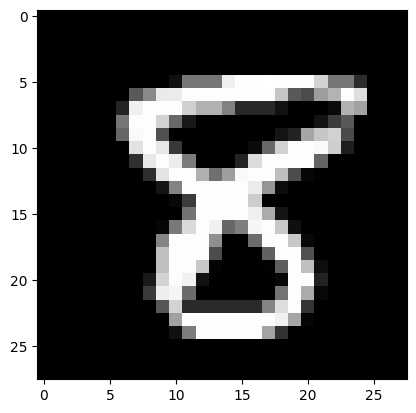

ith iteration :  97 j index:  278
Prediction:  [8]
Label:  8


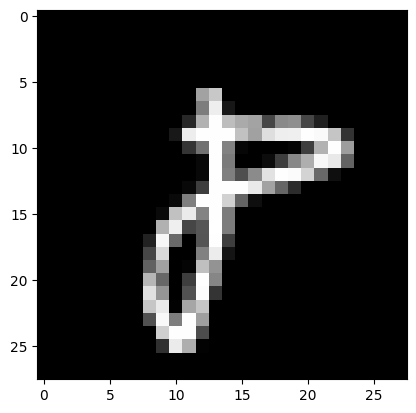

ith iteration :  98 j index:  923
Prediction:  [7]
Label:  7


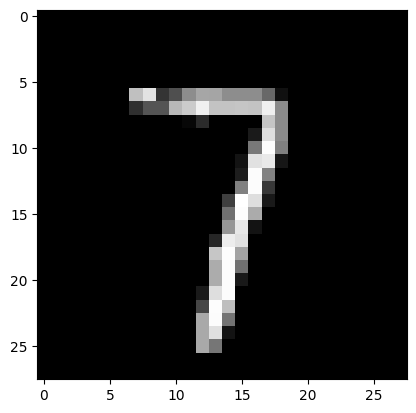

ith iteration :  99 j index:  456
Prediction:  [4]
Label:  4


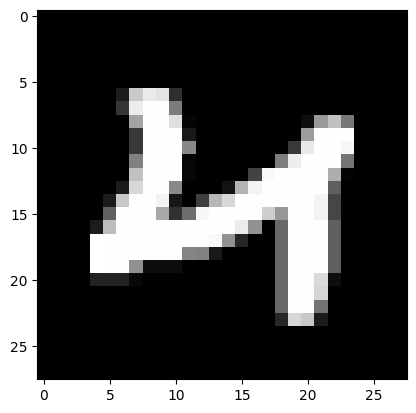

ith iteration :  100 j index:  922
Prediction:  [5]
Label:  5


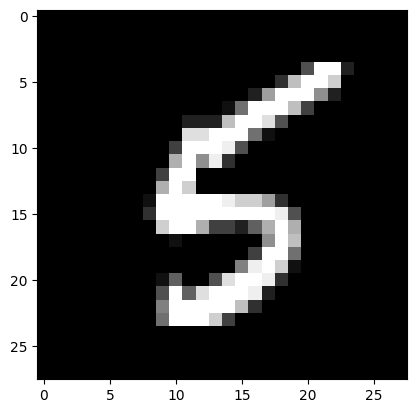

ith iteration :  101 j index:  311
Prediction:  [8]
Label:  8


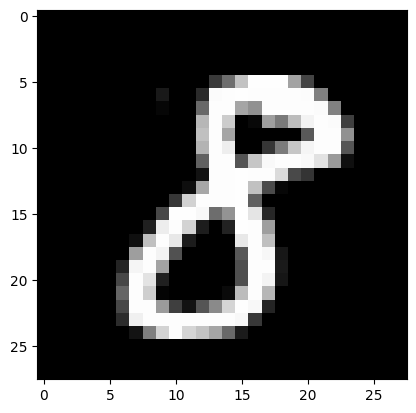

ith iteration :  102 j index:  525
Prediction:  [1]
Label:  1


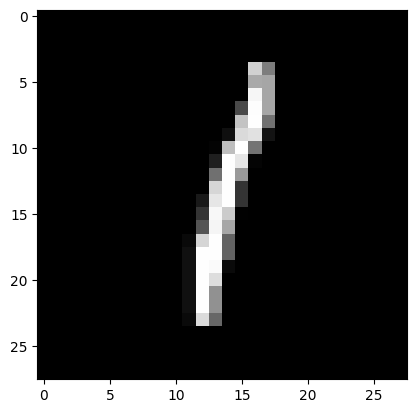

ith iteration :  103 j index:  492
Prediction:  [2]
Label:  2


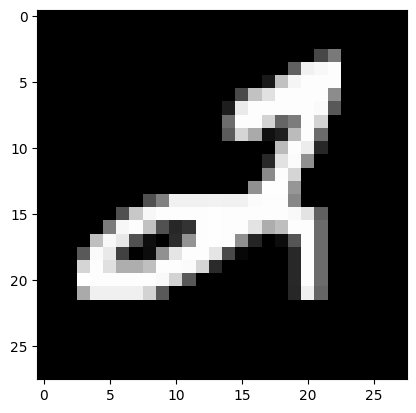

ith iteration :  104 j index:  843
Prediction:  [1]
Label:  1


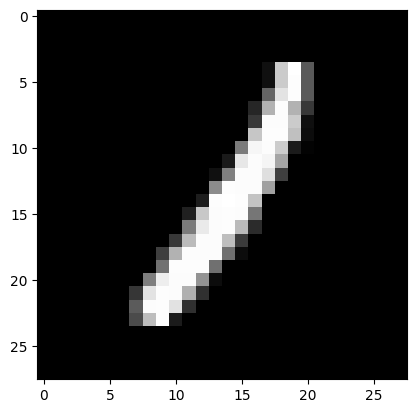

ith iteration :  105 j index:  495
Prediction:  [7]
Label:  7


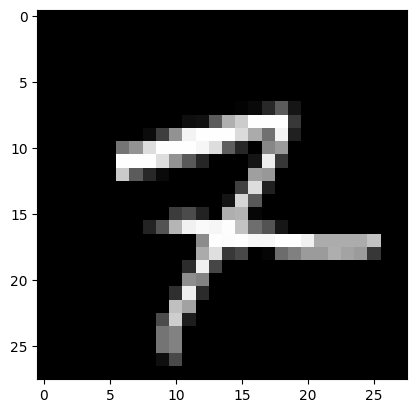

ith iteration :  106 j index:  189
Prediction:  [7]
Label:  7


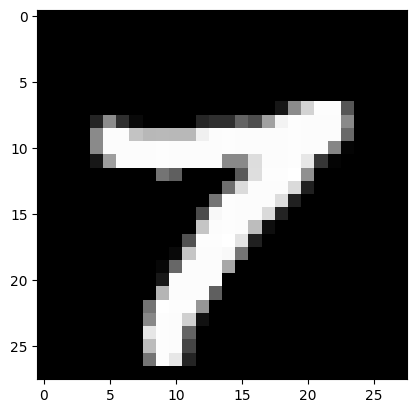

ith iteration :  107 j index:  915
Prediction:  [4]
Label:  4


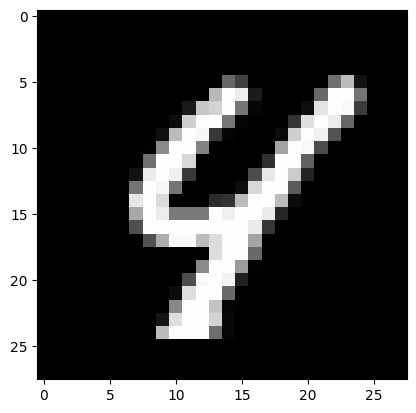

ith iteration :  108 j index:  618
Prediction:  [7]
Label:  7


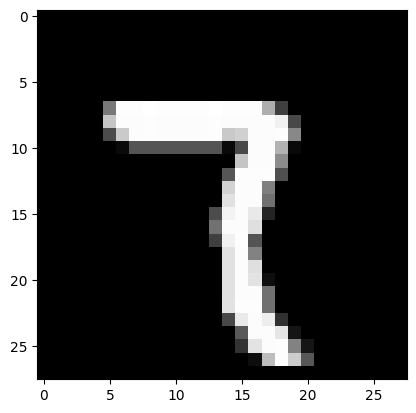

ith iteration :  109 j index:  788
Prediction:  [4]
Label:  4


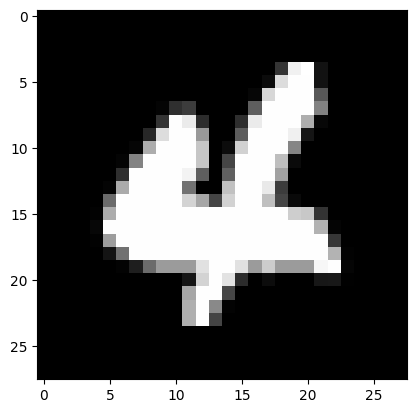

ith iteration :  110 j index:  591
Prediction:  [2]
Label:  2


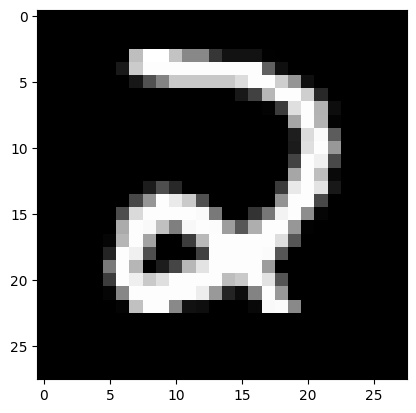

ith iteration :  111 j index:  9
Prediction:  [9]
Label:  9


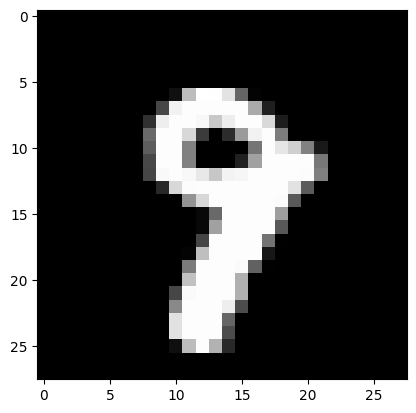

ith iteration :  112 j index:  455
Prediction:  [3]
Label:  3


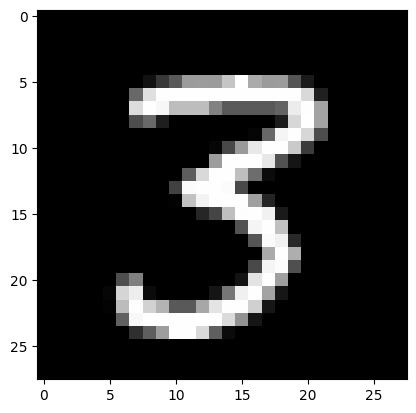

ith iteration :  113 j index:  899
Prediction:  [5]
Label:  5


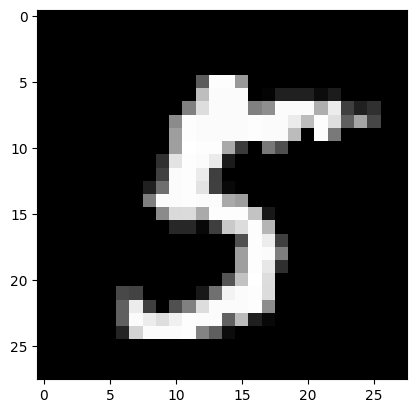

ith iteration :  114 j index:  810
Prediction:  [9]
Label:  9


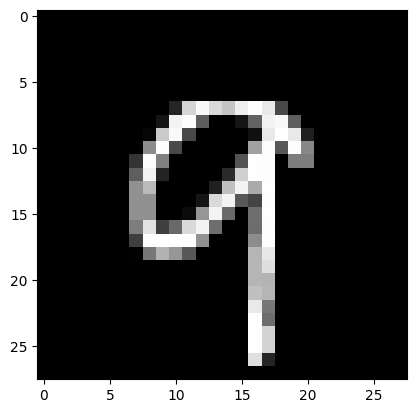

ith iteration :  115 j index:  829
Prediction:  [4]
Label:  4


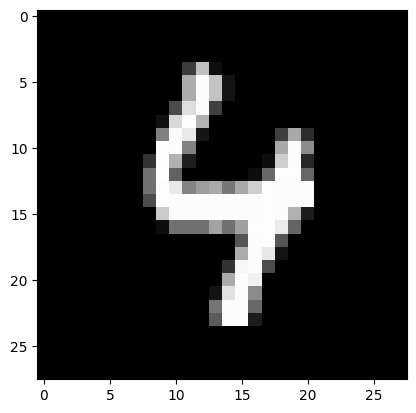

ith iteration :  116 j index:  513
Prediction:  [1]
Label:  1


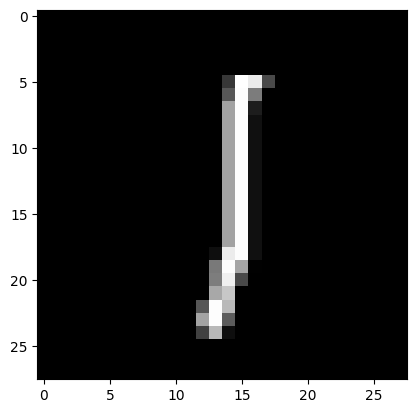

ith iteration :  117 j index:  658
Prediction:  [1]
Label:  1


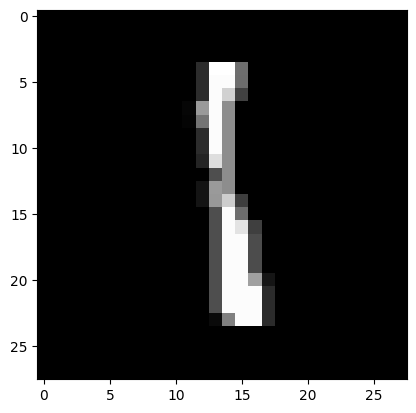

ith iteration :  118 j index:  388
Prediction:  [5]
Label:  5


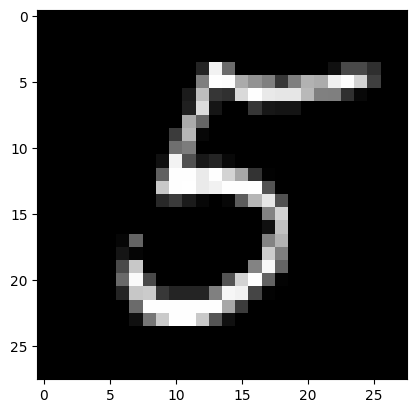

ith iteration :  119 j index:  472
Prediction:  [6]
Label:  6


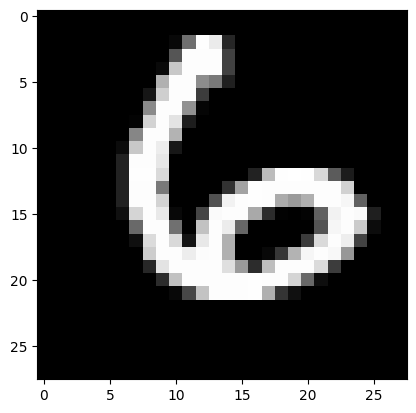

ith iteration :  120 j index:  593
Prediction:  [6]
Label:  6


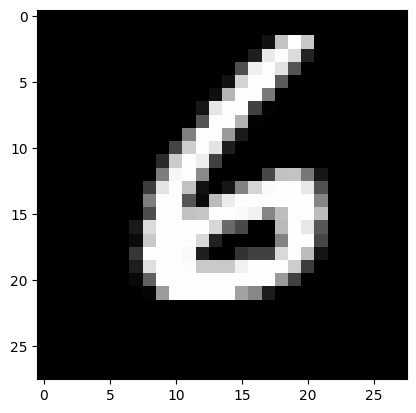

ith iteration :  121 j index:  254
Prediction:  [5]
Label:  8


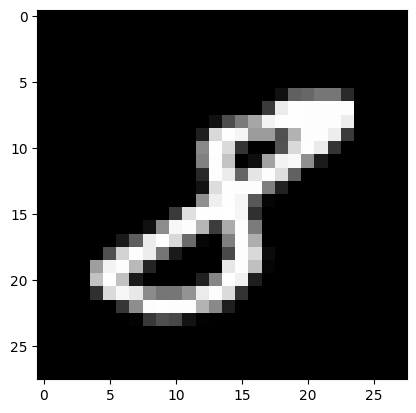

ith iteration :  122 j index:  348
Prediction:  [8]
Label:  8


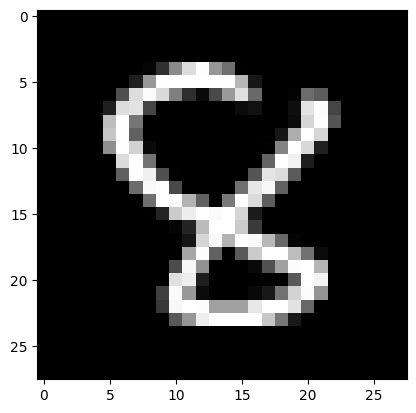

ith iteration :  123 j index:  996
Prediction:  [9]
Label:  9


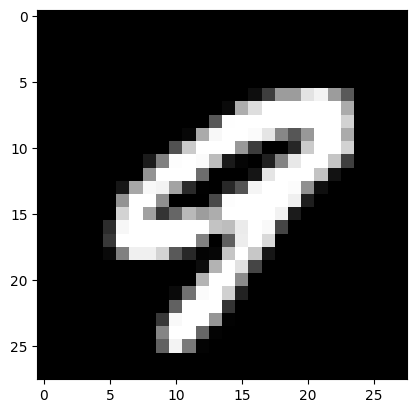

ith iteration :  124 j index:  127
Prediction:  [2]
Label:  2


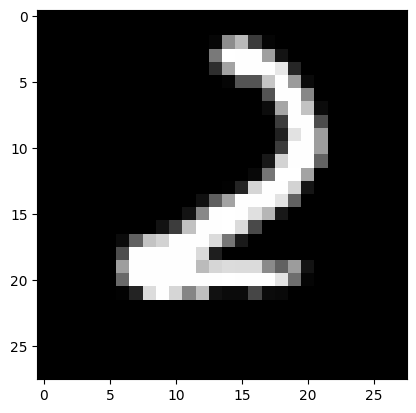

ith iteration :  125 j index:  657
Prediction:  [9]
Label:  5


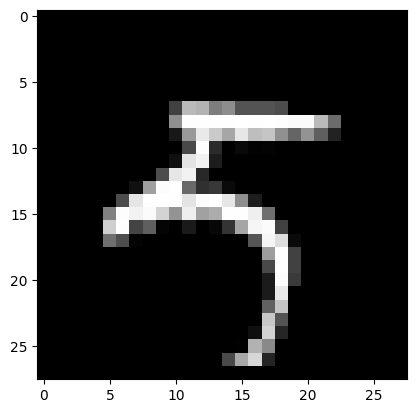

ith iteration :  126 j index:  85
Prediction:  [3]
Label:  3


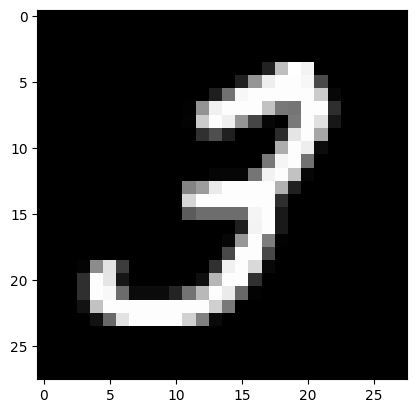

ith iteration :  127 j index:  114
Prediction:  [5]
Label:  5


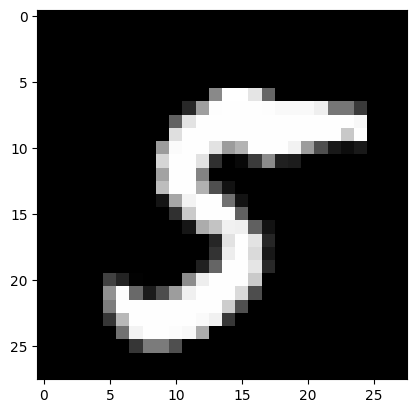

ith iteration :  128 j index:  305
Prediction:  [1]
Label:  1


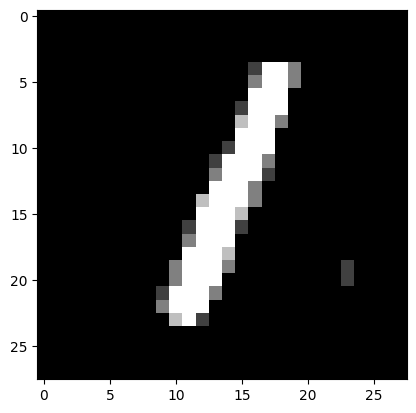

ith iteration :  129 j index:  905
Prediction:  [8]
Label:  8


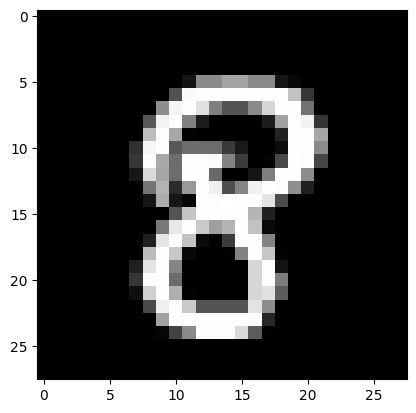

ith iteration :  130 j index:  509
Prediction:  [5]
Label:  5


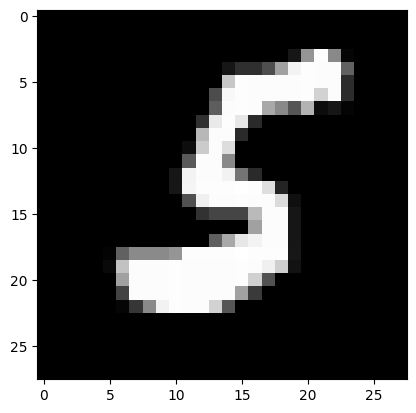

ith iteration :  131 j index:  670
Prediction:  [0]
Label:  0


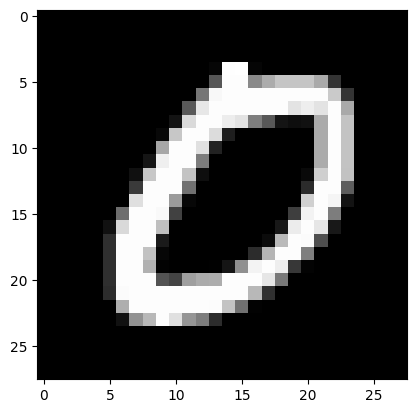

ith iteration :  132 j index:  643
Prediction:  [1]
Label:  1


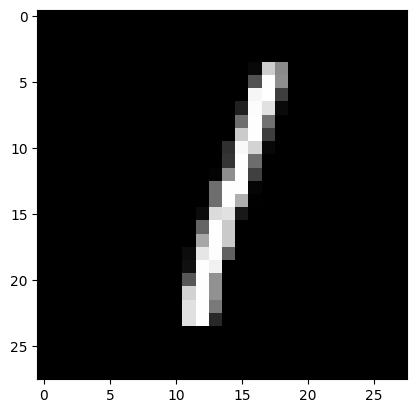

ith iteration :  133 j index:  163
Prediction:  [2]
Label:  7


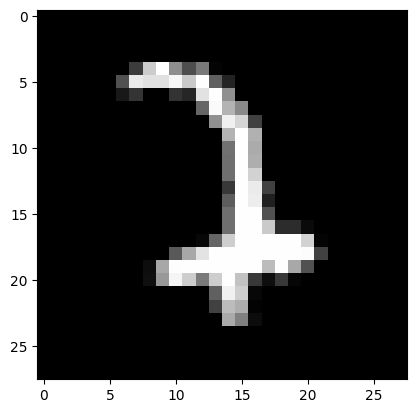

ith iteration :  134 j index:  491
Prediction:  [9]
Label:  9


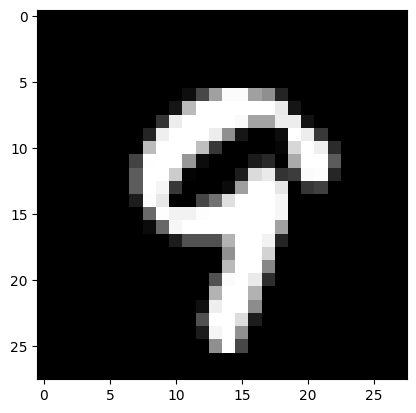

ith iteration :  135 j index:  160
Prediction:  [5]
Label:  5


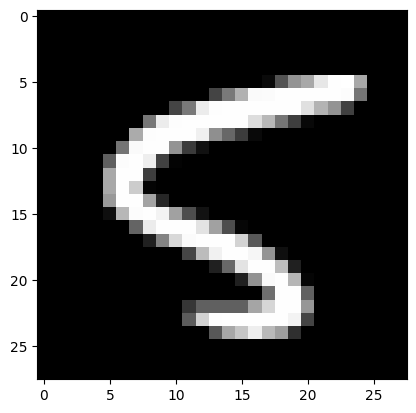

ith iteration :  136 j index:  149
Prediction:  [9]
Label:  9


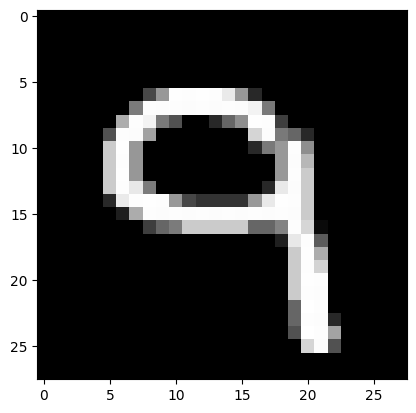

ith iteration :  137 j index:  990
Prediction:  [2]
Label:  2


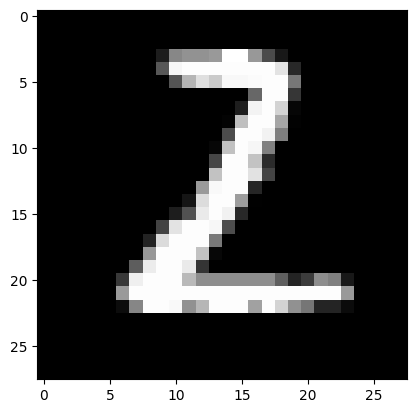

ith iteration :  138 j index:  587
Prediction:  [1]
Label:  1


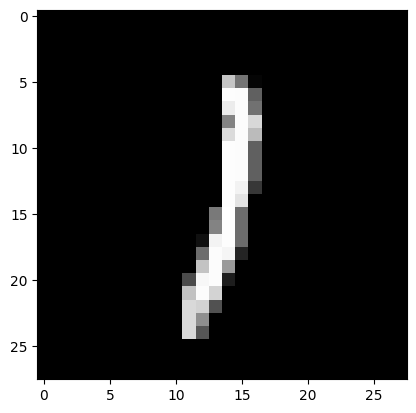

ith iteration :  139 j index:  749
Prediction:  [7]
Label:  7


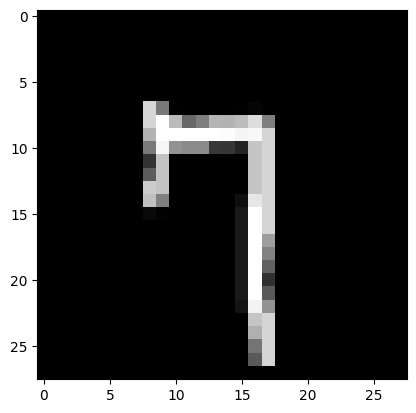

ith iteration :  140 j index:  342
Prediction:  [2]
Label:  2


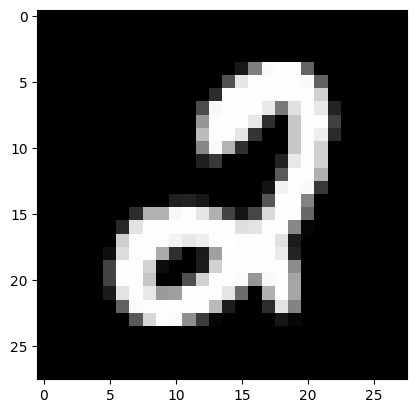

ith iteration :  141 j index:  136
Prediction:  [6]
Label:  6


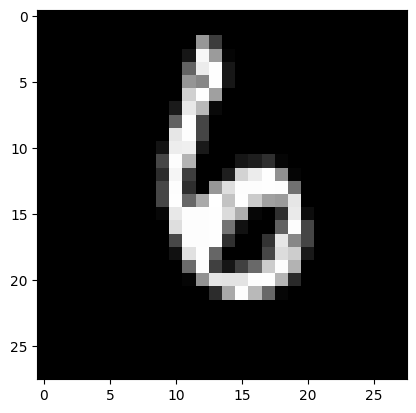

ith iteration :  142 j index:  168
Prediction:  [1]
Label:  1


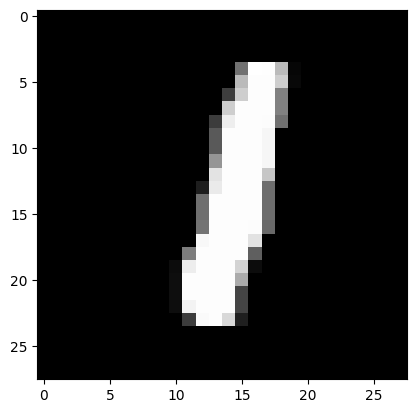

ith iteration :  143 j index:  328
Prediction:  [8]
Label:  8


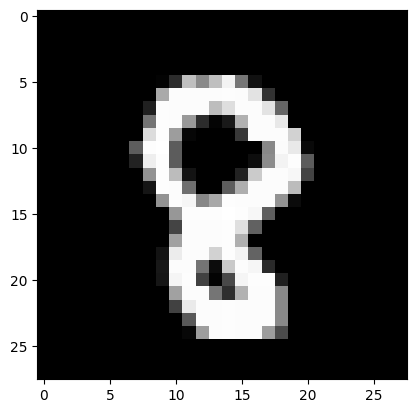

ith iteration :  144 j index:  693
Prediction:  [9]
Label:  9


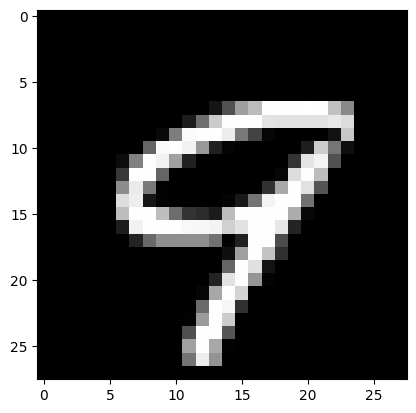

ith iteration :  145 j index:  40
Prediction:  [1]
Label:  1


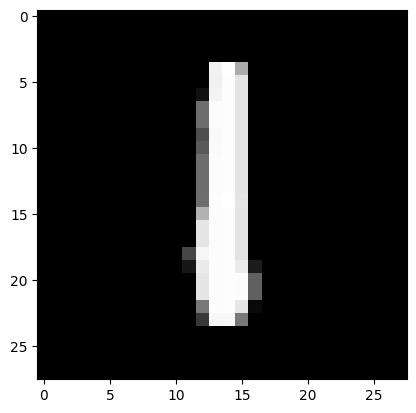

ith iteration :  146 j index:  707
Prediction:  [3]
Label:  3


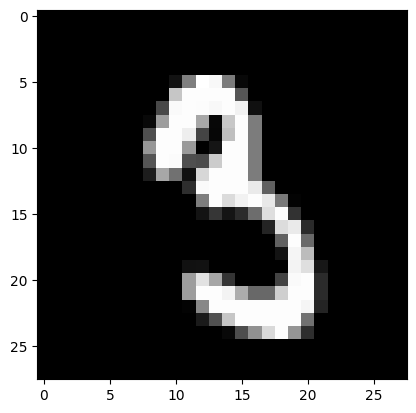

ith iteration :  147 j index:  765
Prediction:  [4]
Label:  4


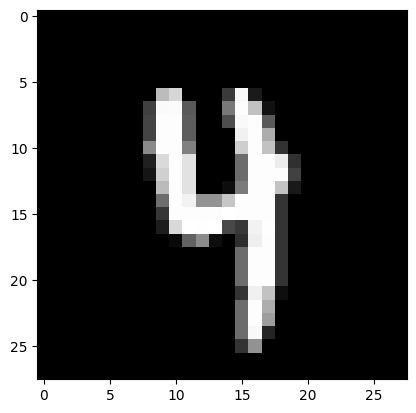

ith iteration :  148 j index:  213
Prediction:  [8]
Label:  8


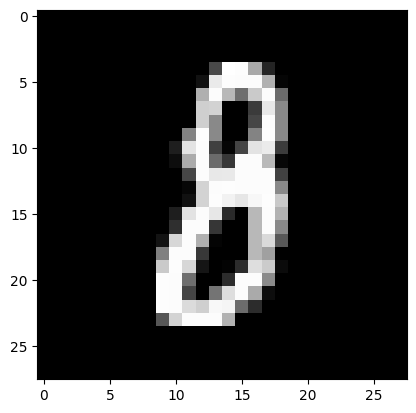

ith iteration :  149 j index:  101
Prediction:  [1]
Label:  1


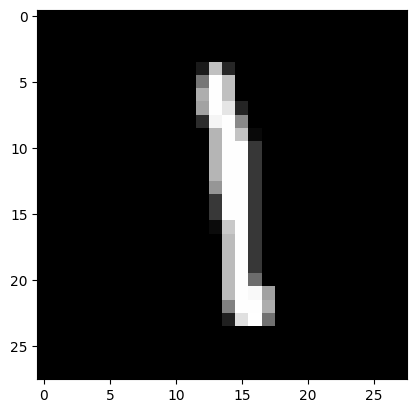

ith iteration :  150 j index:  659
Prediction:  [4]
Label:  4


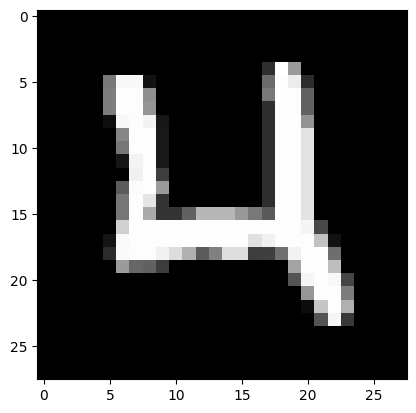

ith iteration :  151 j index:  301
Prediction:  [1]
Label:  1


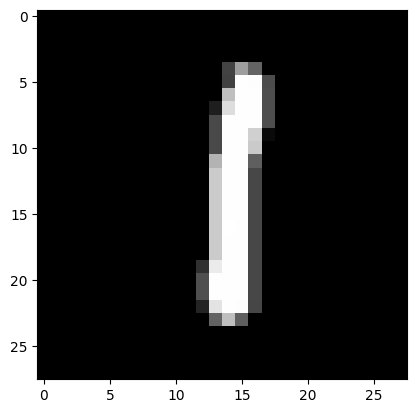

ith iteration :  152 j index:  322
Prediction:  [7]
Label:  9


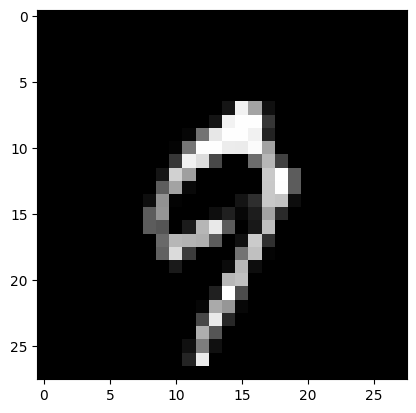

ith iteration :  153 j index:  295
Prediction:  [1]
Label:  1


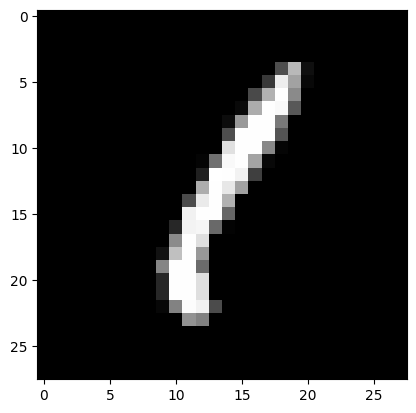

ith iteration :  154 j index:  567
Prediction:  [1]
Label:  1


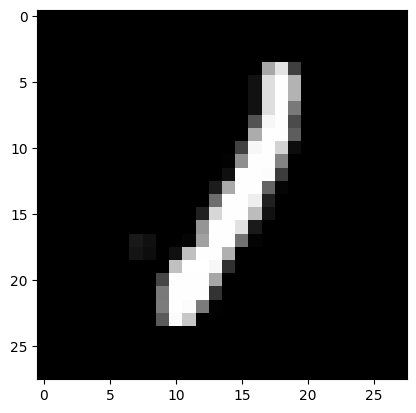

ith iteration :  155 j index:  983
Prediction:  [5]
Label:  5


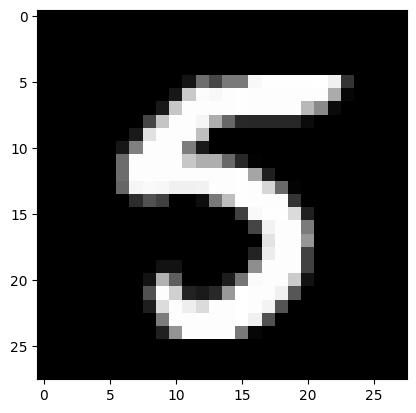

ith iteration :  156 j index:  17
Prediction:  [3]
Label:  3


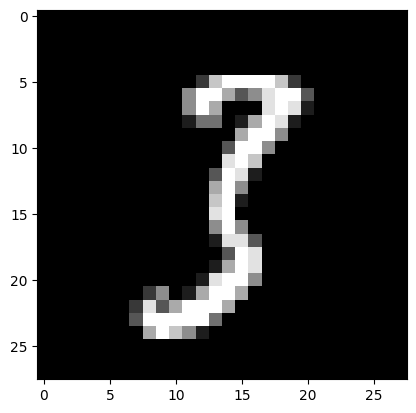

ith iteration :  157 j index:  578
Prediction:  [5]
Label:  5


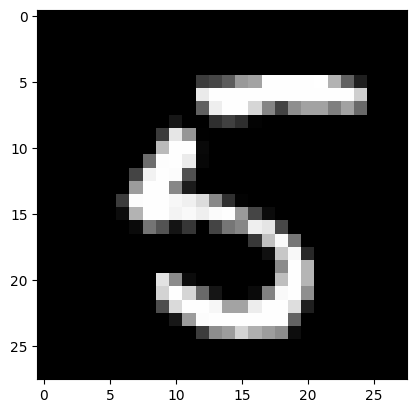

ith iteration :  158 j index:  177
Prediction:  [0]
Label:  0


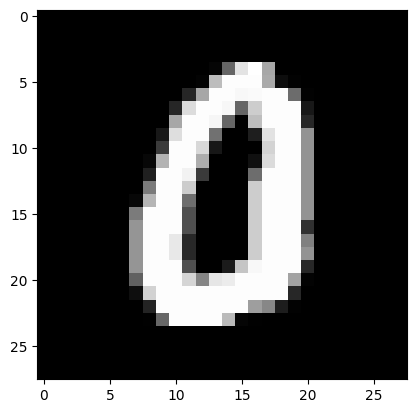

ith iteration :  159 j index:  101
Prediction:  [1]
Label:  1


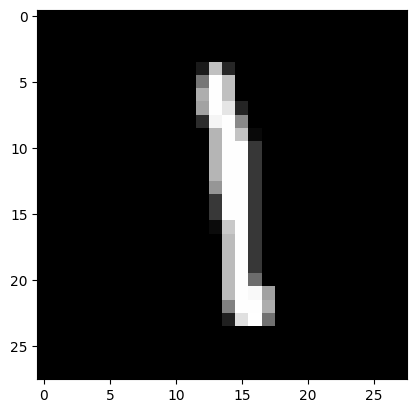

ith iteration :  160 j index:  280
Prediction:  [2]
Label:  2


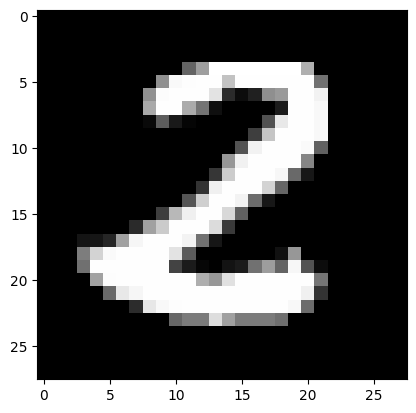

ith iteration :  161 j index:  590
Prediction:  [1]
Label:  1


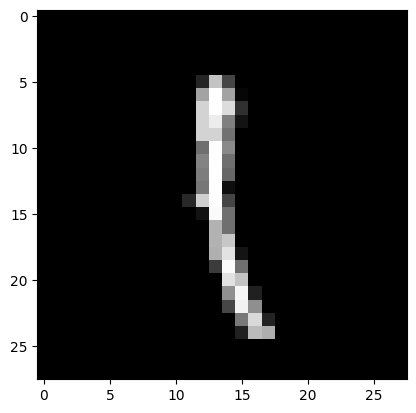

ith iteration :  162 j index:  80
Prediction:  [7]
Label:  7


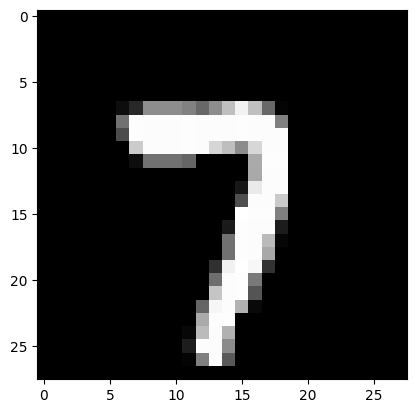

ith iteration :  163 j index:  212
Prediction:  [8]
Label:  8


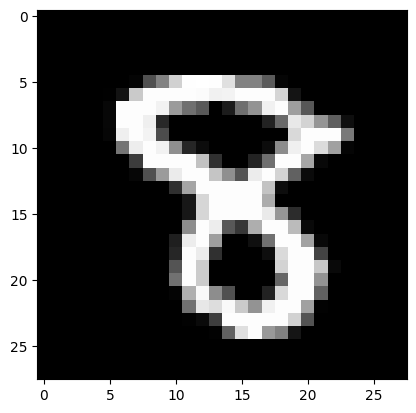

ith iteration :  164 j index:  610
Prediction:  [8]
Label:  8


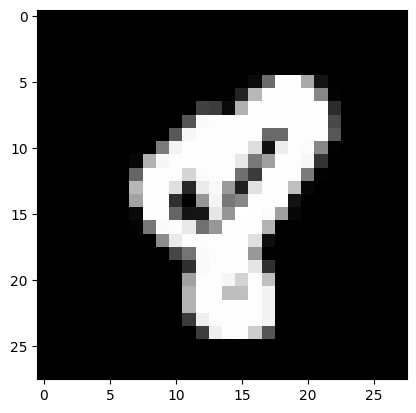

ith iteration :  165 j index:  95
Prediction:  [3]
Label:  3


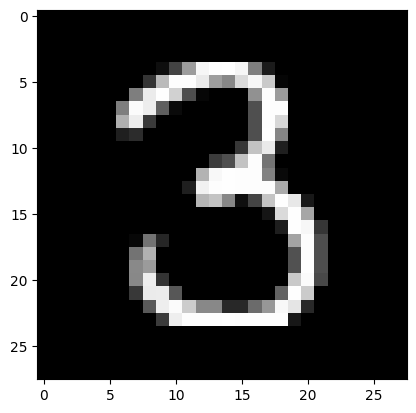

ith iteration :  166 j index:  229
Prediction:  [5]
Label:  5


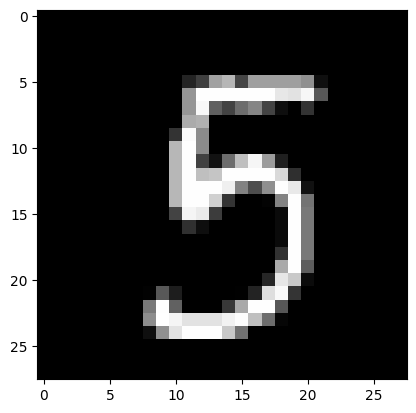

ith iteration :  167 j index:  971
Prediction:  [3]
Label:  3


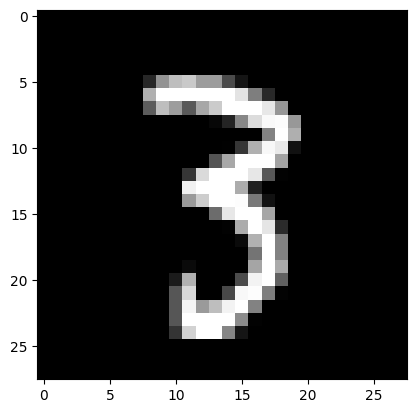

ith iteration :  168 j index:  997
Prediction:  [0]
Label:  0


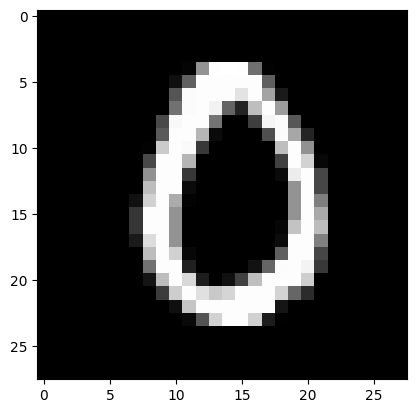

ith iteration :  169 j index:  199
Prediction:  [0]
Label:  0


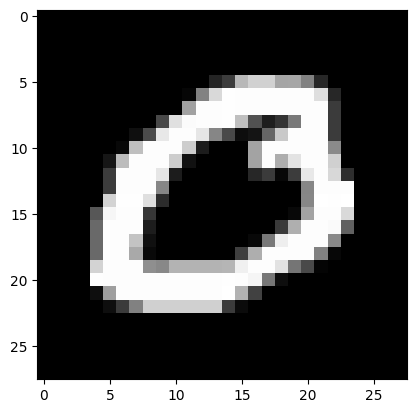

ith iteration :  170 j index:  890
Prediction:  [1]
Label:  1


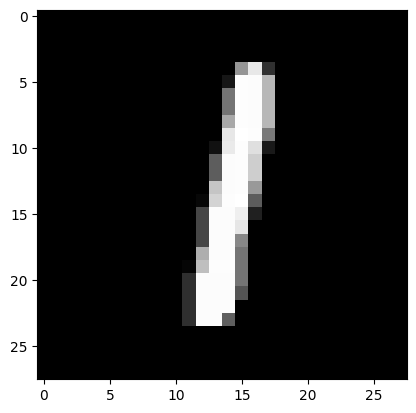

ith iteration :  171 j index:  197
Prediction:  [8]
Label:  8


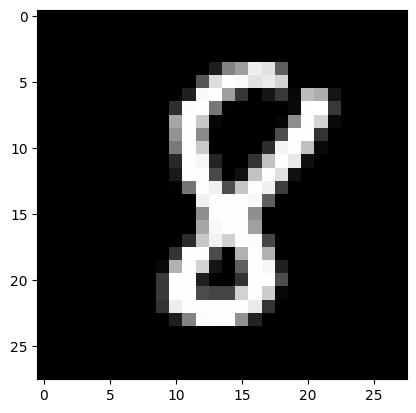

ith iteration :  172 j index:  704
Prediction:  [1]
Label:  1


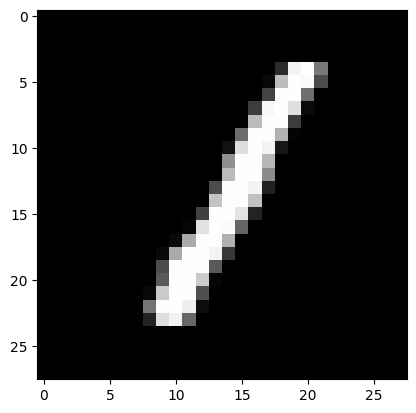

ith iteration :  173 j index:  111
Prediction:  [8]
Label:  8


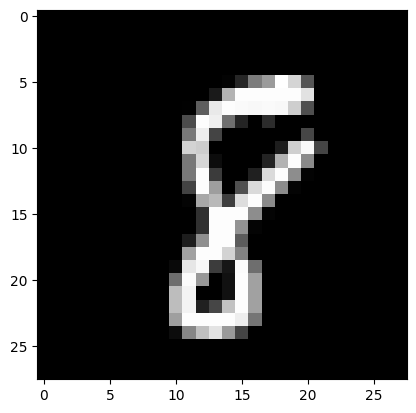

ith iteration :  174 j index:  832
Prediction:  [5]
Label:  5


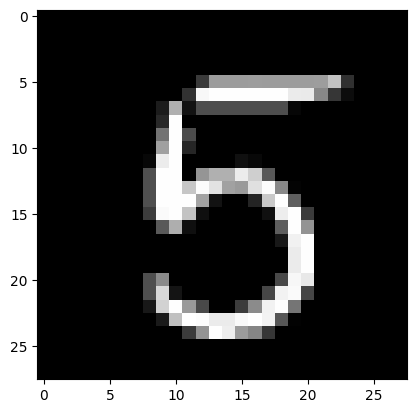

ith iteration :  175 j index:  535
Prediction:  [3]
Label:  3


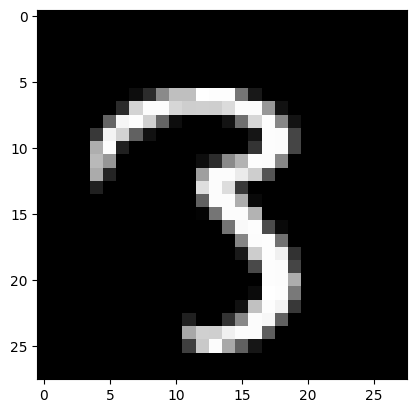

ith iteration :  176 j index:  158
Prediction:  [1]
Label:  1


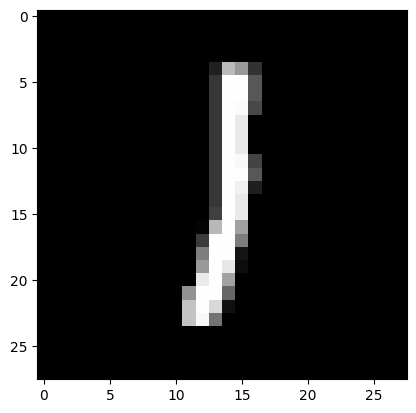

ith iteration :  177 j index:  376
Prediction:  [1]
Label:  1


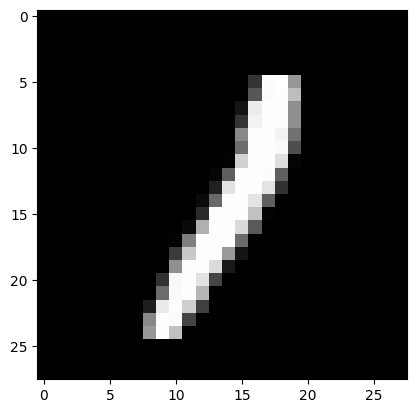

ith iteration :  178 j index:  22
Prediction:  [8]
Label:  8


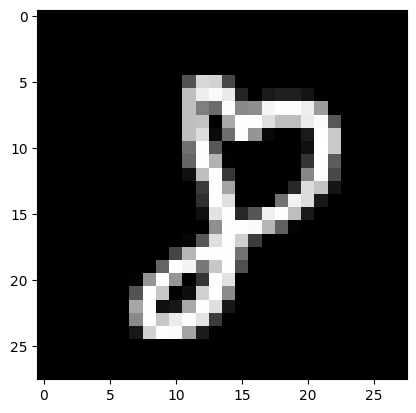

ith iteration :  179 j index:  837
Prediction:  [2]
Label:  2


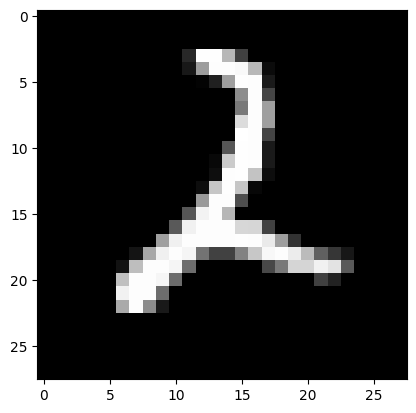

ith iteration :  180 j index:  304
Prediction:  [9]
Label:  8


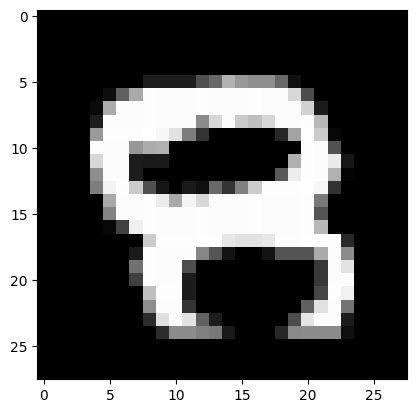

ith iteration :  181 j index:  0
Prediction:  [5]
Label:  5


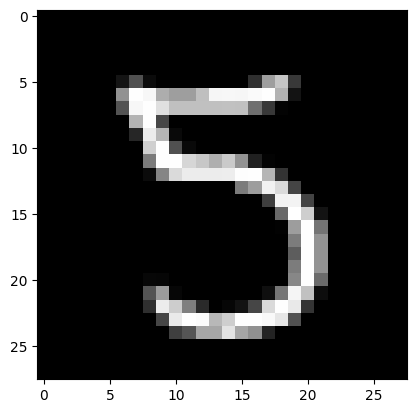

ith iteration :  182 j index:  739
Prediction:  [2]
Label:  2


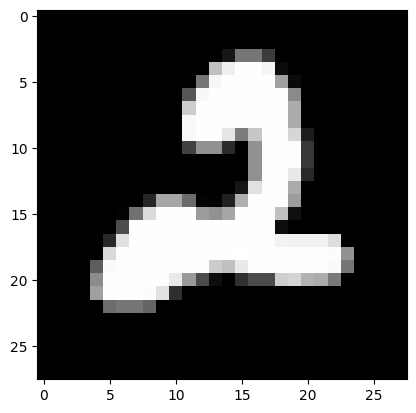

ith iteration :  183 j index:  776
Prediction:  [7]
Label:  7


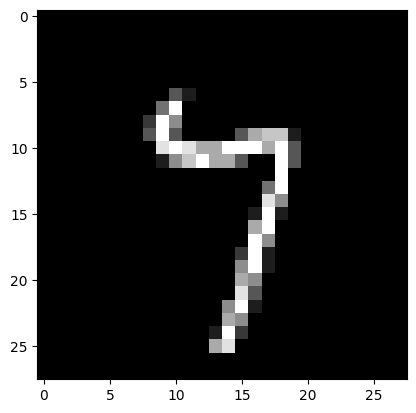

ith iteration :  184 j index:  723
Prediction:  [9]
Label:  9


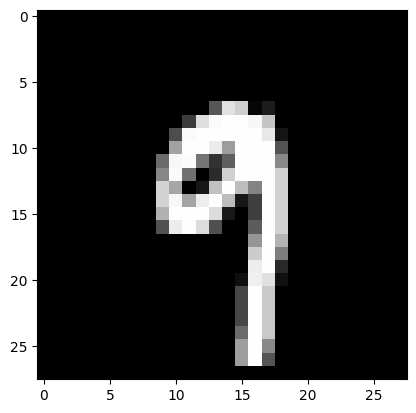

ith iteration :  185 j index:  712
Prediction:  [6]
Label:  6


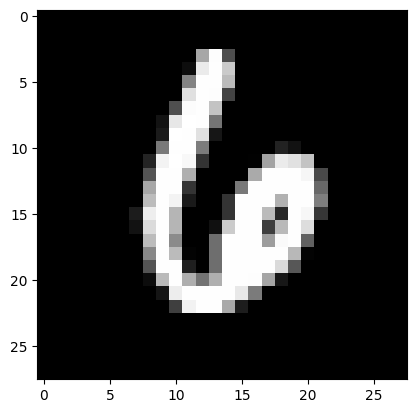

ith iteration :  186 j index:  185
Prediction:  [0]
Label:  0


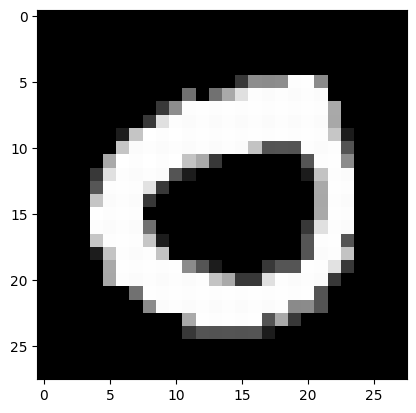

ith iteration :  187 j index:  975
Prediction:  [9]
Label:  9


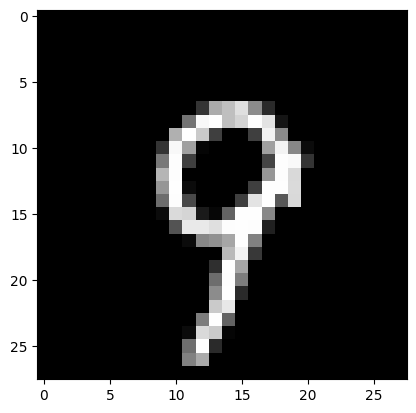

ith iteration :  188 j index:  266
Prediction:  [2]
Label:  2


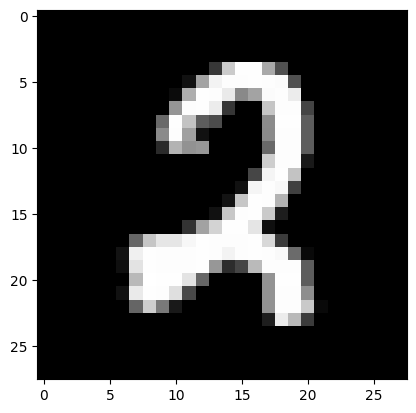

ith iteration :  189 j index:  401
Prediction:  [7]
Label:  7


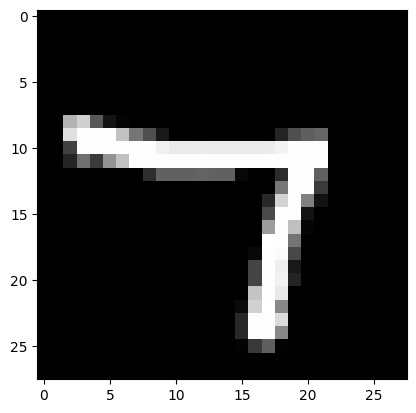

ith iteration :  190 j index:  116
Prediction:  [5]
Label:  5


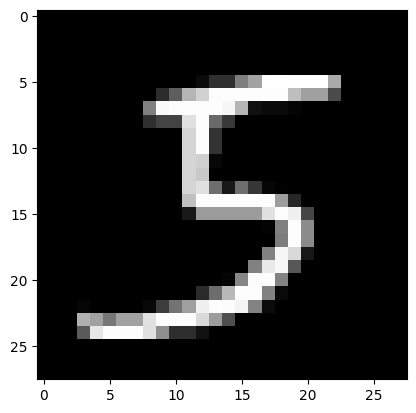

ith iteration :  191 j index:  798
Prediction:  [2]
Label:  2


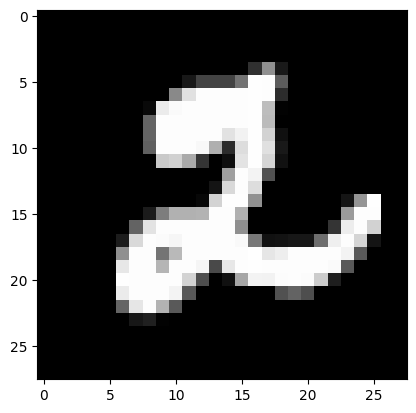

ith iteration :  192 j index:  591
Prediction:  [2]
Label:  2


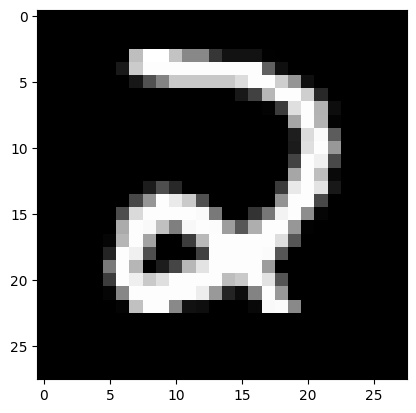

ith iteration :  193 j index:  214
Prediction:  [5]
Label:  5


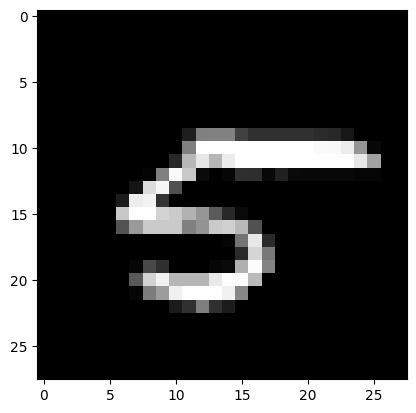

ith iteration :  194 j index:  137
Prediction:  [7]
Label:  7


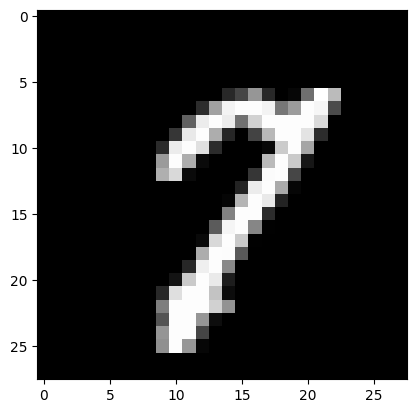

ith iteration :  195 j index:  992
Prediction:  [1]
Label:  1


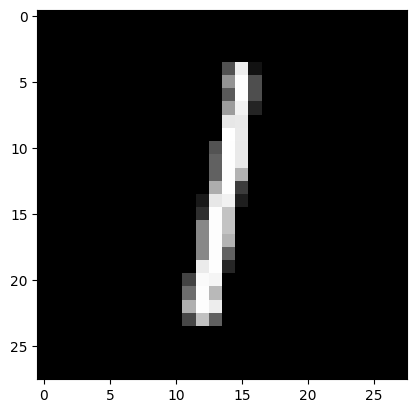

ith iteration :  196 j index:  29
Prediction:  [2]
Label:  2


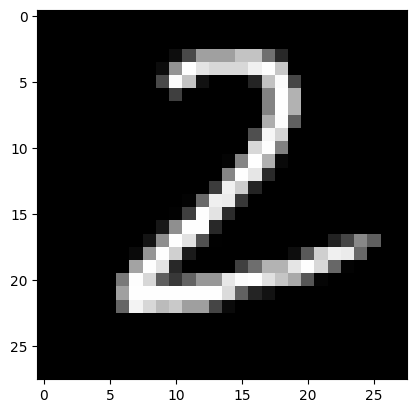

ith iteration :  197 j index:  901
Prediction:  [4]
Label:  4


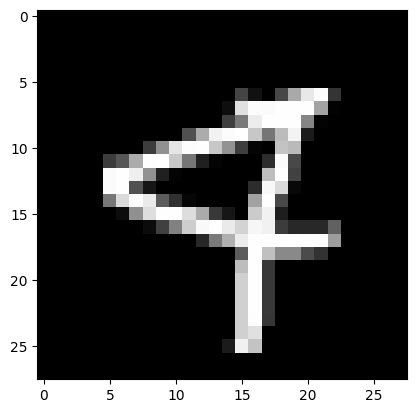

ith iteration :  198 j index:  708
Prediction:  [4]
Label:  4


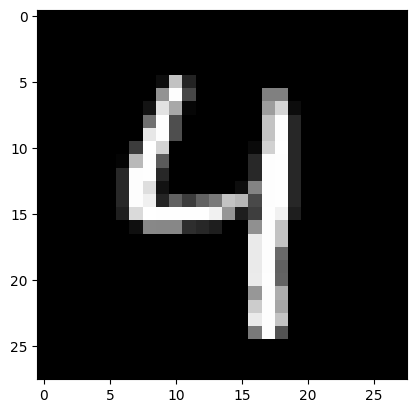

ith iteration :  199 j index:  97
Prediction:  [6]
Label:  4


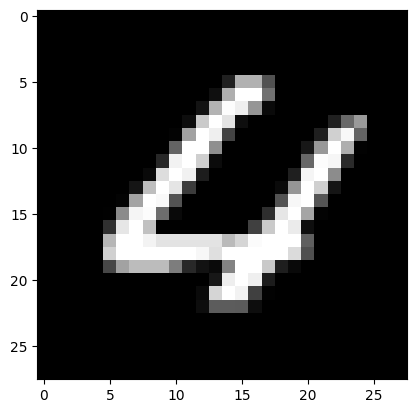

correct:  185


In [178]:
import random

correct=0

for i in range(0,200):
    
    j=random.randint(0,999)
    print("ith iteration : ",i,"j index: ",j)
    (label,prediction)=test_prediction(j,W1,b1,W2,b2)
    if(label==prediction):
        correct=correct+1

print("correct: ",correct)